In [2]:
import queuing as q
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.dpi'] = 300

OUTPUT_FOLDER = "./results/"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [3]:
minSamples = 100
maxSamples = 1000000
SEED = 42
targetSTD = 0.01
MU = 1
RHO = np.linspace(0.5, 1.0, 51)

# 2. Effect of $\rho = \frac{\lambda}{n\mu}$ on attaining target standard deviation

In [3]:
for N_SERVER in [1, 2, 4]:
    
    list, stds = [], []

    for i in RHO:
        LAMBDA = i * N_SERVER * MU
        l, s = q.experiment(N_SERVER, LAMBDA, q.markovTimeDist(MU), minSamples, maxSamples, SEED, targetSTD, "F", False)
        list.append(l)
        stds.append(s)

    q.saveTxt(OUTPUT_FOLDER + f"M_M_{N_SERVER}", list)

2.541358172881557
0.015941637848356602
Samples: 10000
3.2148200253566506
0.012678367452784785
Samples: 20000
2.6701148358180706
0.0163404860264867
Samples: 10000
3.3882491587962913
0.0130158540995132
Samples: 20000
3.128825929907811
0.010212453067877164
Samples: 30000
2.808798820553978
0.016759471413364976
Samples: 10000
3.570950226072912
0.013362167163437433
Samples: 20000
3.2960485194691733
0.010481807286069792
Samples: 30000
2.9659815763868775
0.01722202536401244
Samples: 10000
3.7667715521699567
0.013723650301887535
Samples: 20000
3.475532407476449
0.010763413968124379
Samples: 30000
3.131782464394735
0.01769684283818652
Samples: 10000
3.971241777404093
0.014091206082880366
Samples: 20000
3.66431276973051
0.011051866764986673
Samples: 30000
3.305596960111242
0.01818130072385153
Samples: 10000
4.185796463431788
0.01446685256618002
Samples: 20000
3.862946016961369
0.011347460827517567
Samples: 30000
3.4915535704654035
0.018685699265656084
Samples: 10000
4.413767967386155
0.0148555847

In [4]:
# fig, ax = plt.subplots(2, 1, figsize=(4, 10))
# ax[0].plot(RHO, [len(l) for l in list])
# ax[1].plot(RHO, stds)
# plt.show()

# 3. Shortest job first scheduling

In [5]:
N_SERVER = 1

In [6]:
list, stds = [], []

for i in RHO:
    LAMBDA = i * N_SERVER * MU
    l, s = q.experiment(N_SERVER, LAMBDA, q.markovTimeDist(MU), minSamples, maxSamples, SEED, targetSTD, "T", False)
    list.append(l)
    stds.append(s)

q.saveTxt(OUTPUT_FOLDER + f"M_M_{N_SERVER}_shortest_job_first", list)

1.7904222291079293
0.013380666011480628
Samples: 10000
2.2463267175164066
0.010597940171364449
Samples: 20000
1.8942221963617423
0.01376307449795191
Samples: 10000
2.37705806789559
0.010901967867994269
Samples: 20000
2.0576889823384676
0.014344647023675652
Samples: 10000
2.594560792907848
0.011389821756524216
Samples: 20000
2.167208789974502
0.014721442830016702
Samples: 10000
2.7165470911965746
0.011654499326862083
Samples: 20000
2.247855726525266
0.014992850718009787
Samples: 10000
2.840155980798131
0.011916702523764975
Samples: 20000
2.4232509951971255
0.015566794773482193
Samples: 10000
3.0406862677247375
0.01233021951898006
Samples: 20000
2.4697617622942216
0.01571547569211388
Samples: 10000
3.124064838653816
0.012498129537362412
Samples: 20000
2.6186065443953033
0.016182109085021344
Samples: 10000
3.284894499018
0.012815799817057848
Samples: 20000
3.0025747868775956
0.010004290391089875
Samples: 30000
2.7844638107476007
0.01668671271026022
Samples: 10000
3.4736143824233414
0.0131

# 4. Different service rate distributions

## Deterministic distribution

In [7]:
tInter = 1

In [8]:
for N_SERVER in [1, 2, 4]:
    
    list, stds = [], []

    for i in RHO:
        LAMBDA = i * N_SERVER * MU
        l, s = q.experiment(N_SERVER, LAMBDA, q.deterministicTimeDist(tInter), minSamples, maxSamples, SEED, targetSTD, "F", False)
        list.append(l)
        stds.append(s)

    q.saveTxt(OUTPUT_FOLDER + f"M_D_{N_SERVER}", list)

1.023773411197761
0.010118168861991586
Samples: 10000
1.0869683199701932
0.010425777285028647
Samples: 10000
1.154233295677643
0.010743525006615115
Samples: 10000
1.2262263752202394
0.011073510623195514
Samples: 10000
1.3038494494527557
0.011418622725411134
Samples: 10000
1.3861363587758222
0.011773429231858585
Samples: 10000
1.4728241247513152
0.012135996558796956
Samples: 10000
1.565182788868841
0.012510726553117692
Samples: 10000
1.6654152364582167
0.012905096808851208
Samples: 10000
1.776050295967161
0.013326853702082728
Samples: 10000
1.9010750510143386
0.013787947820521873
Samples: 10000
2.04059140223877
0.014284927029000779
Samples: 10000
2.1965239278667696
0.014820674505118751
Samples: 10000
2.1370213944513683
0.010336879109410557
Samples: 20000
2.3672461085443266
0.015385857494934518
Samples: 10000
2.301248874844562
0.010726716354142496
Samples: 20000
2.5540343711428055
0.01598134653633043
Samples: 10000
2.4809205856524814
0.01113759530969877
Samples: 20000
2.7596783146136863


## Hyperexponential longtail-distribution

In [9]:
rateA = 1.0
rateB = 5.0
probA = 0.75

MU = rateA * probA + rateB * (1 - probA) # Time average rate

In [10]:
for N_SERVER in [1, 2, 4]:
    
    list, stds = [], []
    
    for i in RHO:
        LAMBDA = i * N_SERVER * MU
        l, s = q.experiment(N_SERVER, LAMBDA, q.longtailHyperexponentialDist(rateA, rateB, probA), minSamples, maxSamples, SEED, targetSTD, "F", False)
        list.append(l)
        stds.append(s)

    q.saveTxt(OUTPUT_FOLDER + f"M_H_{N_SERVER}", list)

1.076470542672277
0.01037530983957721
Samples: 10000
1.1152029567725377
0.010560317025414236
Samples: 10000
1.1551444291757633
0.010747764554435324
Samples: 10000
1.1961148137356683
0.010936703405211592
Samples: 10000
1.238139796395549
0.011127173029999797
Samples: 10000
1.2814320999843183
0.011320035777259357
Samples: 10000
1.3260944646483608
0.011515617502541325
Samples: 10000
1.3722124915923988
0.01171414739361085
Samples: 10000
1.4207285588039842
0.011919431860638258
Samples: 10000
1.4704875958589292
0.012126366297695817
Samples: 10000
1.5215401680241674
0.01233507263060971
Samples: 10000
1.5738454399700683
0.012545299677449193
Samples: 10000
1.627706812752261
0.012758161359507336
Samples: 10000
1.687942544571431
0.012992084299955227
Samples: 10000
1.7602796577750106
0.013267553119452775
Samples: 10000
1.8387556984276283
0.01356007263412563
Samples: 10000
1.9218182913043353
0.013862966101467375
Samples: 10000
2.1078594916335653
0.014518469243117765
Samples: 10000
2.208787797657637


# Loading results

In [5]:
list_M_M_1 = q.readTxt(OUTPUT_FOLDER + "M_M_1")
list_M_M_2 = q.readTxt(OUTPUT_FOLDER + "M_M_2")
list_M_M_4 = q.readTxt(OUTPUT_FOLDER + "M_M_4")

list_M_M_1_shortest_job_first = q.readTxt(OUTPUT_FOLDER + "M_M_1_shortest_job_first")
print(1)
list_M_D_1 = q.readTxt(OUTPUT_FOLDER + "M_D_1")
list_M_D_2 = q.readTxt(OUTPUT_FOLDER + "M_D_2")
list_M_D_4 = q.readTxt(OUTPUT_FOLDER + "M_D_4")
print(2)
list_M_H_1 = q.readTxt(OUTPUT_FOLDER + "M_H_1")
list_M_H_2 = q.readTxt(OUTPUT_FOLDER + "M_H_2")
list_M_H_4 = q.readTxt(OUTPUT_FOLDER + "M_H_4")
print(3)
list_M_H_1_CorrectRate = q.readTxt(OUTPUT_FOLDER + "M_H_1_CorrectRate")
list_M_H_2_CorrectRate = q.readTxt(OUTPUT_FOLDER + "M_H_2_CorrectRate")
list_M_H_4_CorrectRate = q.readTxt(OUTPUT_FOLDER + "M_H_4_CorrectRate")
print(4)
list_M_H_1_TestRate = q.readTxt(OUTPUT_FOLDER + "M_H_1_TestRate")
list_M_H_2_TestRate = q.readTxt(OUTPUT_FOLDER + "M_H_2_TestRate")
list_M_H_4_TestRate = q.readTxt(OUTPUT_FOLDER + "M_H_4_TestRate")

1
2
3
4


In [6]:
stds_M_M_1 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_M_1]
stds_M_M_2 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_M_2]
stds_M_M_4 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_M_4]

means_M_M_1 = [np.mean(samples) for samples in list_M_M_1]
means_M_M_2 = [np.mean(samples) for samples in list_M_M_2]
means_M_M_4 = [np.mean(samples) for samples in list_M_M_4]

stds_M_M_1_shortest_job_first = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_M_1_shortest_job_first]

means_M_M_1_shortest_job_first = [np.mean(samples) for samples in list_M_M_1_shortest_job_first]

stds_M_D_1 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_D_1]
stds_M_D_2 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_D_2]
stds_M_D_4 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_D_4]

means_M_D_1 = [np.mean(samples) for samples in list_M_D_1]
means_M_D_2 = [np.mean(samples) for samples in list_M_D_2]
means_M_D_4 = [np.mean(samples) for samples in list_M_D_4]

stds_M_H_1 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_1]
stds_M_H_2 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_2]
stds_M_H_4 = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_4]

means_M_H_1 = [np.mean(samples) for samples in list_M_H_1]
means_M_H_2 = [np.mean(samples) for samples in list_M_H_2]
means_M_H_4 = [np.mean(samples) for samples in list_M_H_4]

stds_M_H_1_CorrectRate = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_1_CorrectRate]
stds_M_H_2_CorrectRate = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_2_CorrectRate]
stds_M_H_4_CorrectRate = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_4_CorrectRate]

means_M_H_1_CorrectRate = [np.mean(samples) for samples in list_M_H_1_CorrectRate]
means_M_H_2_CorrectRate = [np.mean(samples) for samples in list_M_H_2_CorrectRate]
means_M_H_4_CorrectRate = [np.mean(samples) for samples in list_M_H_4_CorrectRate]

stds_M_H_1_TestRate = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_1_TestRate]
stds_M_H_2_TestRate = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_2_TestRate]
stds_M_H_4_TestRate = [np.std(samples, ddof=1) / np.sqrt(len(samples)) for samples in list_M_H_4_TestRate]

means_M_H_1_TestRate = [np.mean(samples) for samples in list_M_H_1_TestRate]
means_M_H_2_TestRate = [np.mean(samples) for samples in list_M_H_2_TestRate]
means_M_H_4_TestRate = [np.mean(samples) for samples in list_M_H_4_TestRate]

# Plots

## M/M/n queues

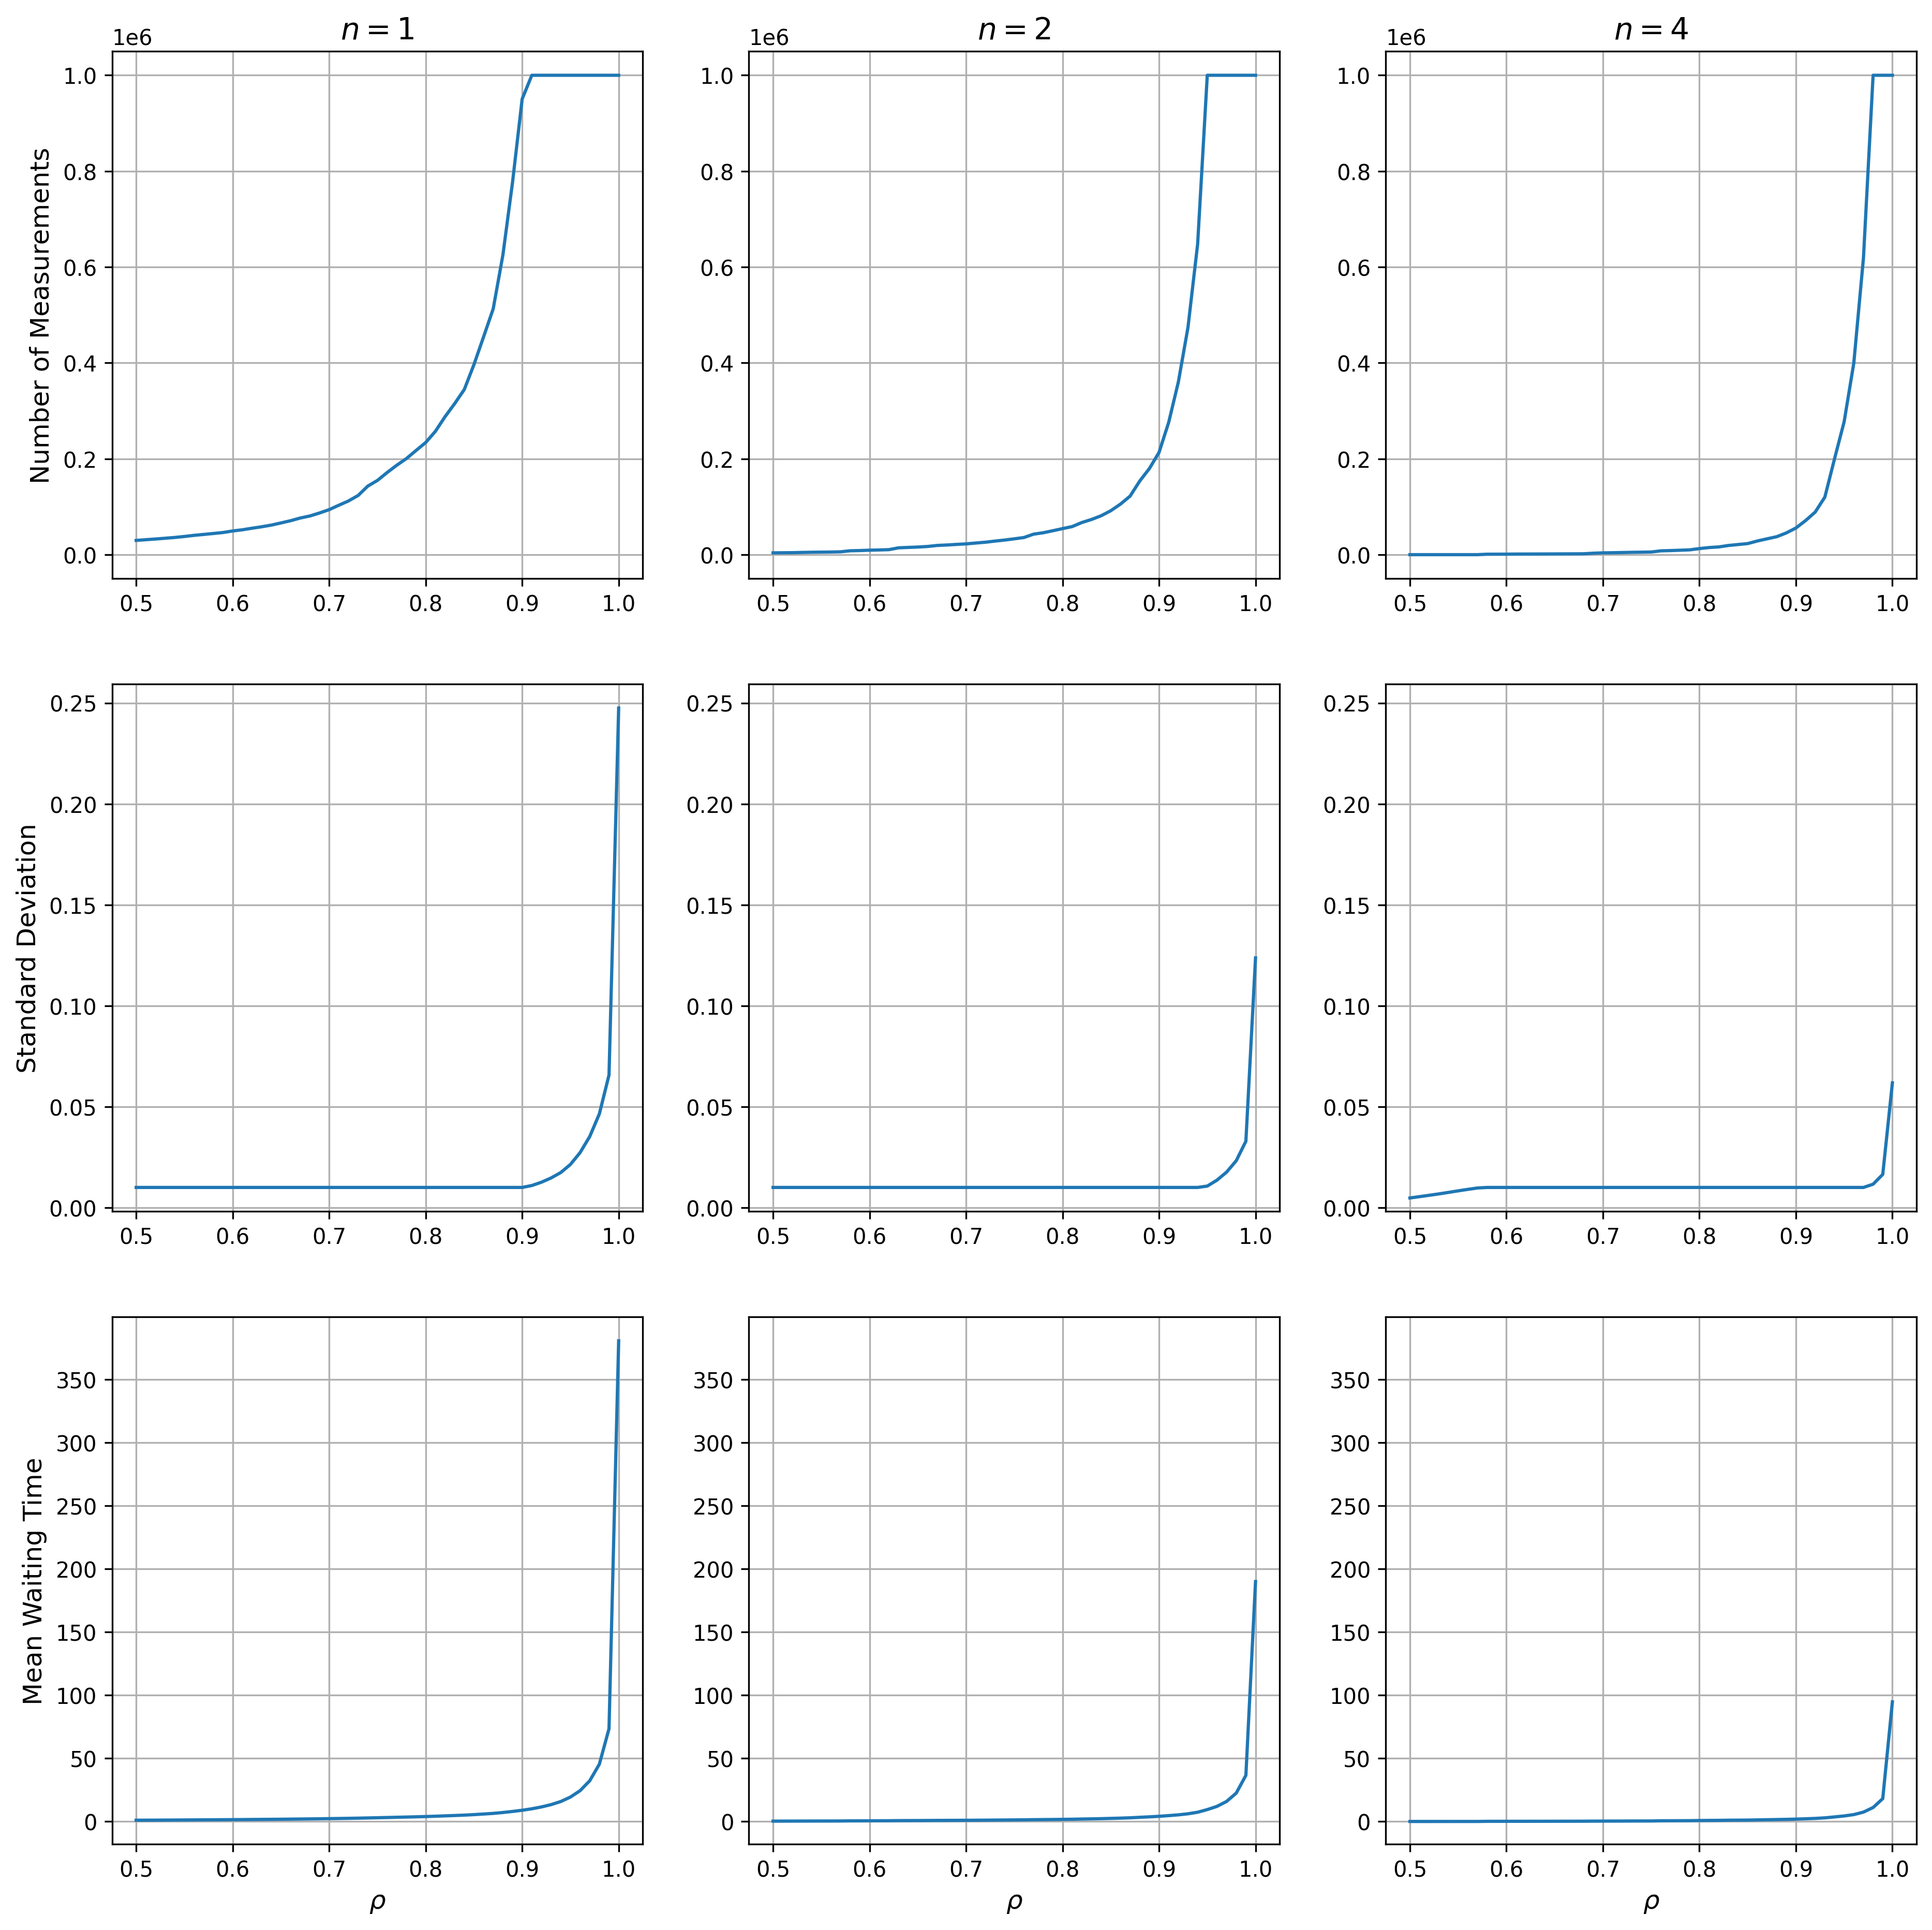

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[0][0].plot(RHO, [len(l) for l in list_M_M_1])
ax[1][0].plot(RHO, stds_M_M_1)
ax[2][0].plot(RHO, means_M_M_1)
ax[0][1].plot(RHO, [len(l) for l in list_M_M_2])
ax[1][1].plot(RHO, stds_M_M_2)
ax[2][1].plot(RHO, means_M_M_2)
ax[0][2].plot(RHO, [len(l) for l in list_M_M_4])
ax[1][2].plot(RHO, stds_M_M_4)
ax[2][2].plot(RHO, means_M_M_4)

ax[0][0].set_title(r"$n=1$", fontsize=14)
ax[0][1].set_title(r"$n=2$", fontsize=14)
ax[0][2].set_title(r"$n=4$", fontsize=14)

ax[0][0].set_ylabel("Number of Measurements", fontsize=12)
ax[1][0].set_ylabel("Standard Deviation", fontsize=12)
ax[2][0].set_ylabel("Mean Waiting Time", fontsize=12)

ax[2][0].set_xlabel(r"$\rho$", fontsize=12)
ax[2][1].set_xlabel(r"$\rho$", fontsize=12)
ax[2][2].set_xlabel(r"$\rho$", fontsize=12)

for i in range(3):
    for j in range(3):
        ax[i][j].grid(True)

row_0_ymin = min(ax[0][i].get_ylim()[0] for i in range(3))
row_0_ymax = max(ax[0][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[0][i].set_ylim(row_0_ymin, row_0_ymax)

row_1_ymin = min(ax[1][i].get_ylim()[0] for i in range(3))
row_1_ymax = max(ax[1][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[1][i].set_ylim(row_1_ymin, row_1_ymax)

row_2_ymin = min(ax[2][i].get_ylim()[0] for i in range(3))
row_2_ymax = max(ax[2][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[2][i].set_ylim(row_2_ymin, row_2_ymax)

#fig.suptitle("M/M/n queues", fontsize=16)

plt.show()

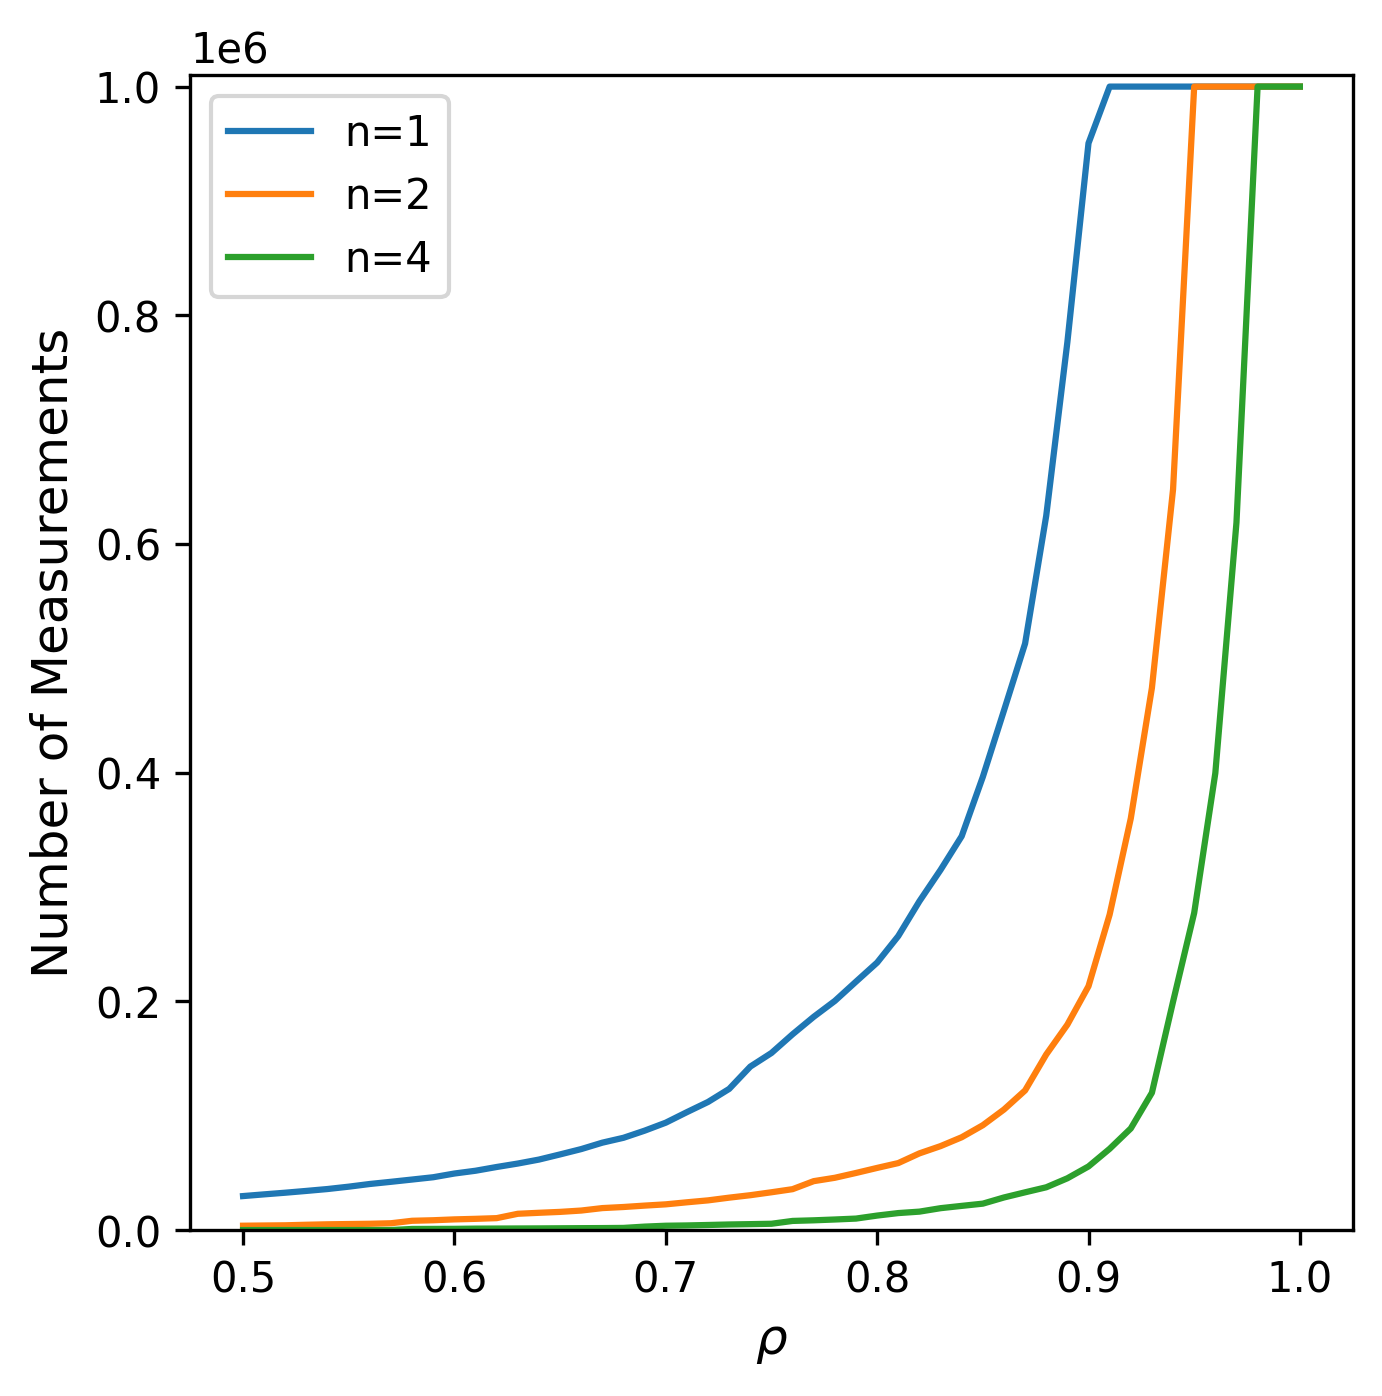

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, [len(l) for l in list_M_M_1], label="n=1")
ax.plot(RHO, [len(l) for l in list_M_M_2], label="n=2")
ax.plot(RHO, [len(l) for l in list_M_M_4], label="n=4")

ax.set_ylabel("Number of Measurements", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 1010000)
ax.legend()

plt.show()

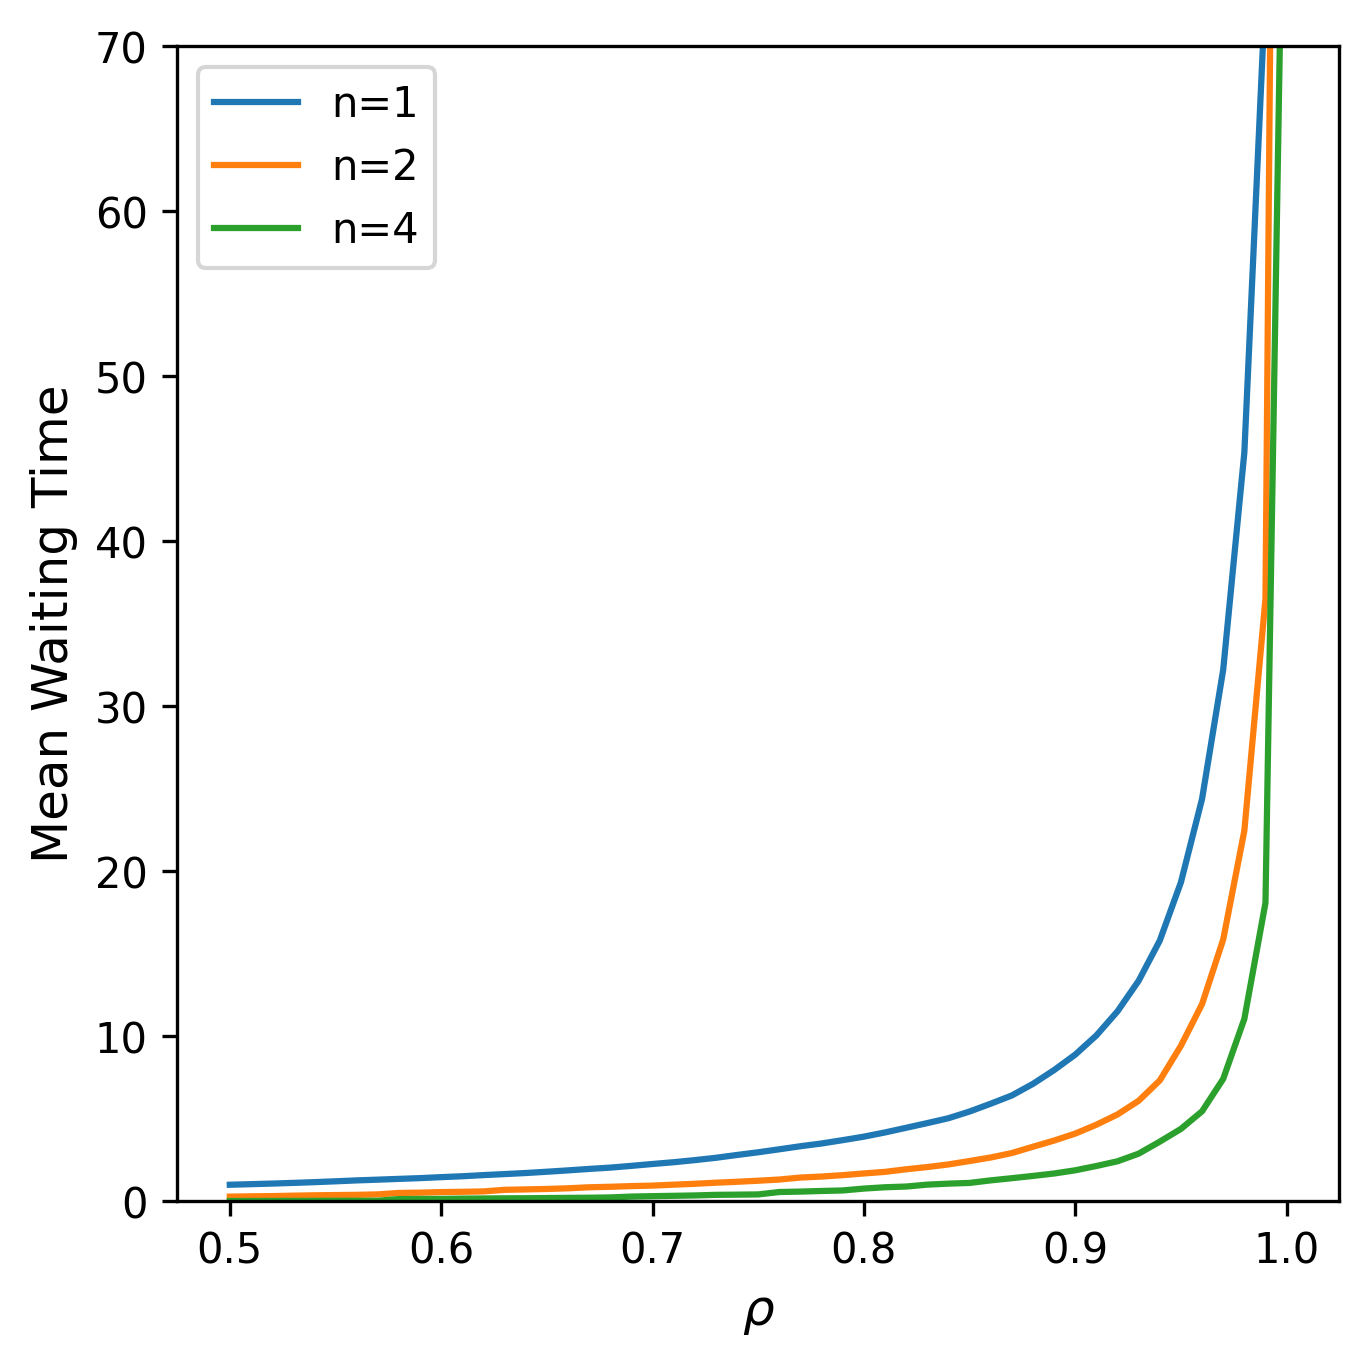

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(RHO, means_M_M_1, label="n=1")
ax.plot(RHO, means_M_M_2, label="n=2")
ax.plot(RHO, means_M_M_4, label="n=4")
#ax.fill_between(RHO, np.asarray(means_M_M_1) + np.asarray(stds_M_M_1),
#                np.asarray(means_M_M_1) - np.asarray(stds_M_M_1), label="Confidence interval", color="tab:blue")


ax.set_ylabel("Mean Waiting Time", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0,70)
ax.legend()

plt.show()

## Shortest job first scheduling

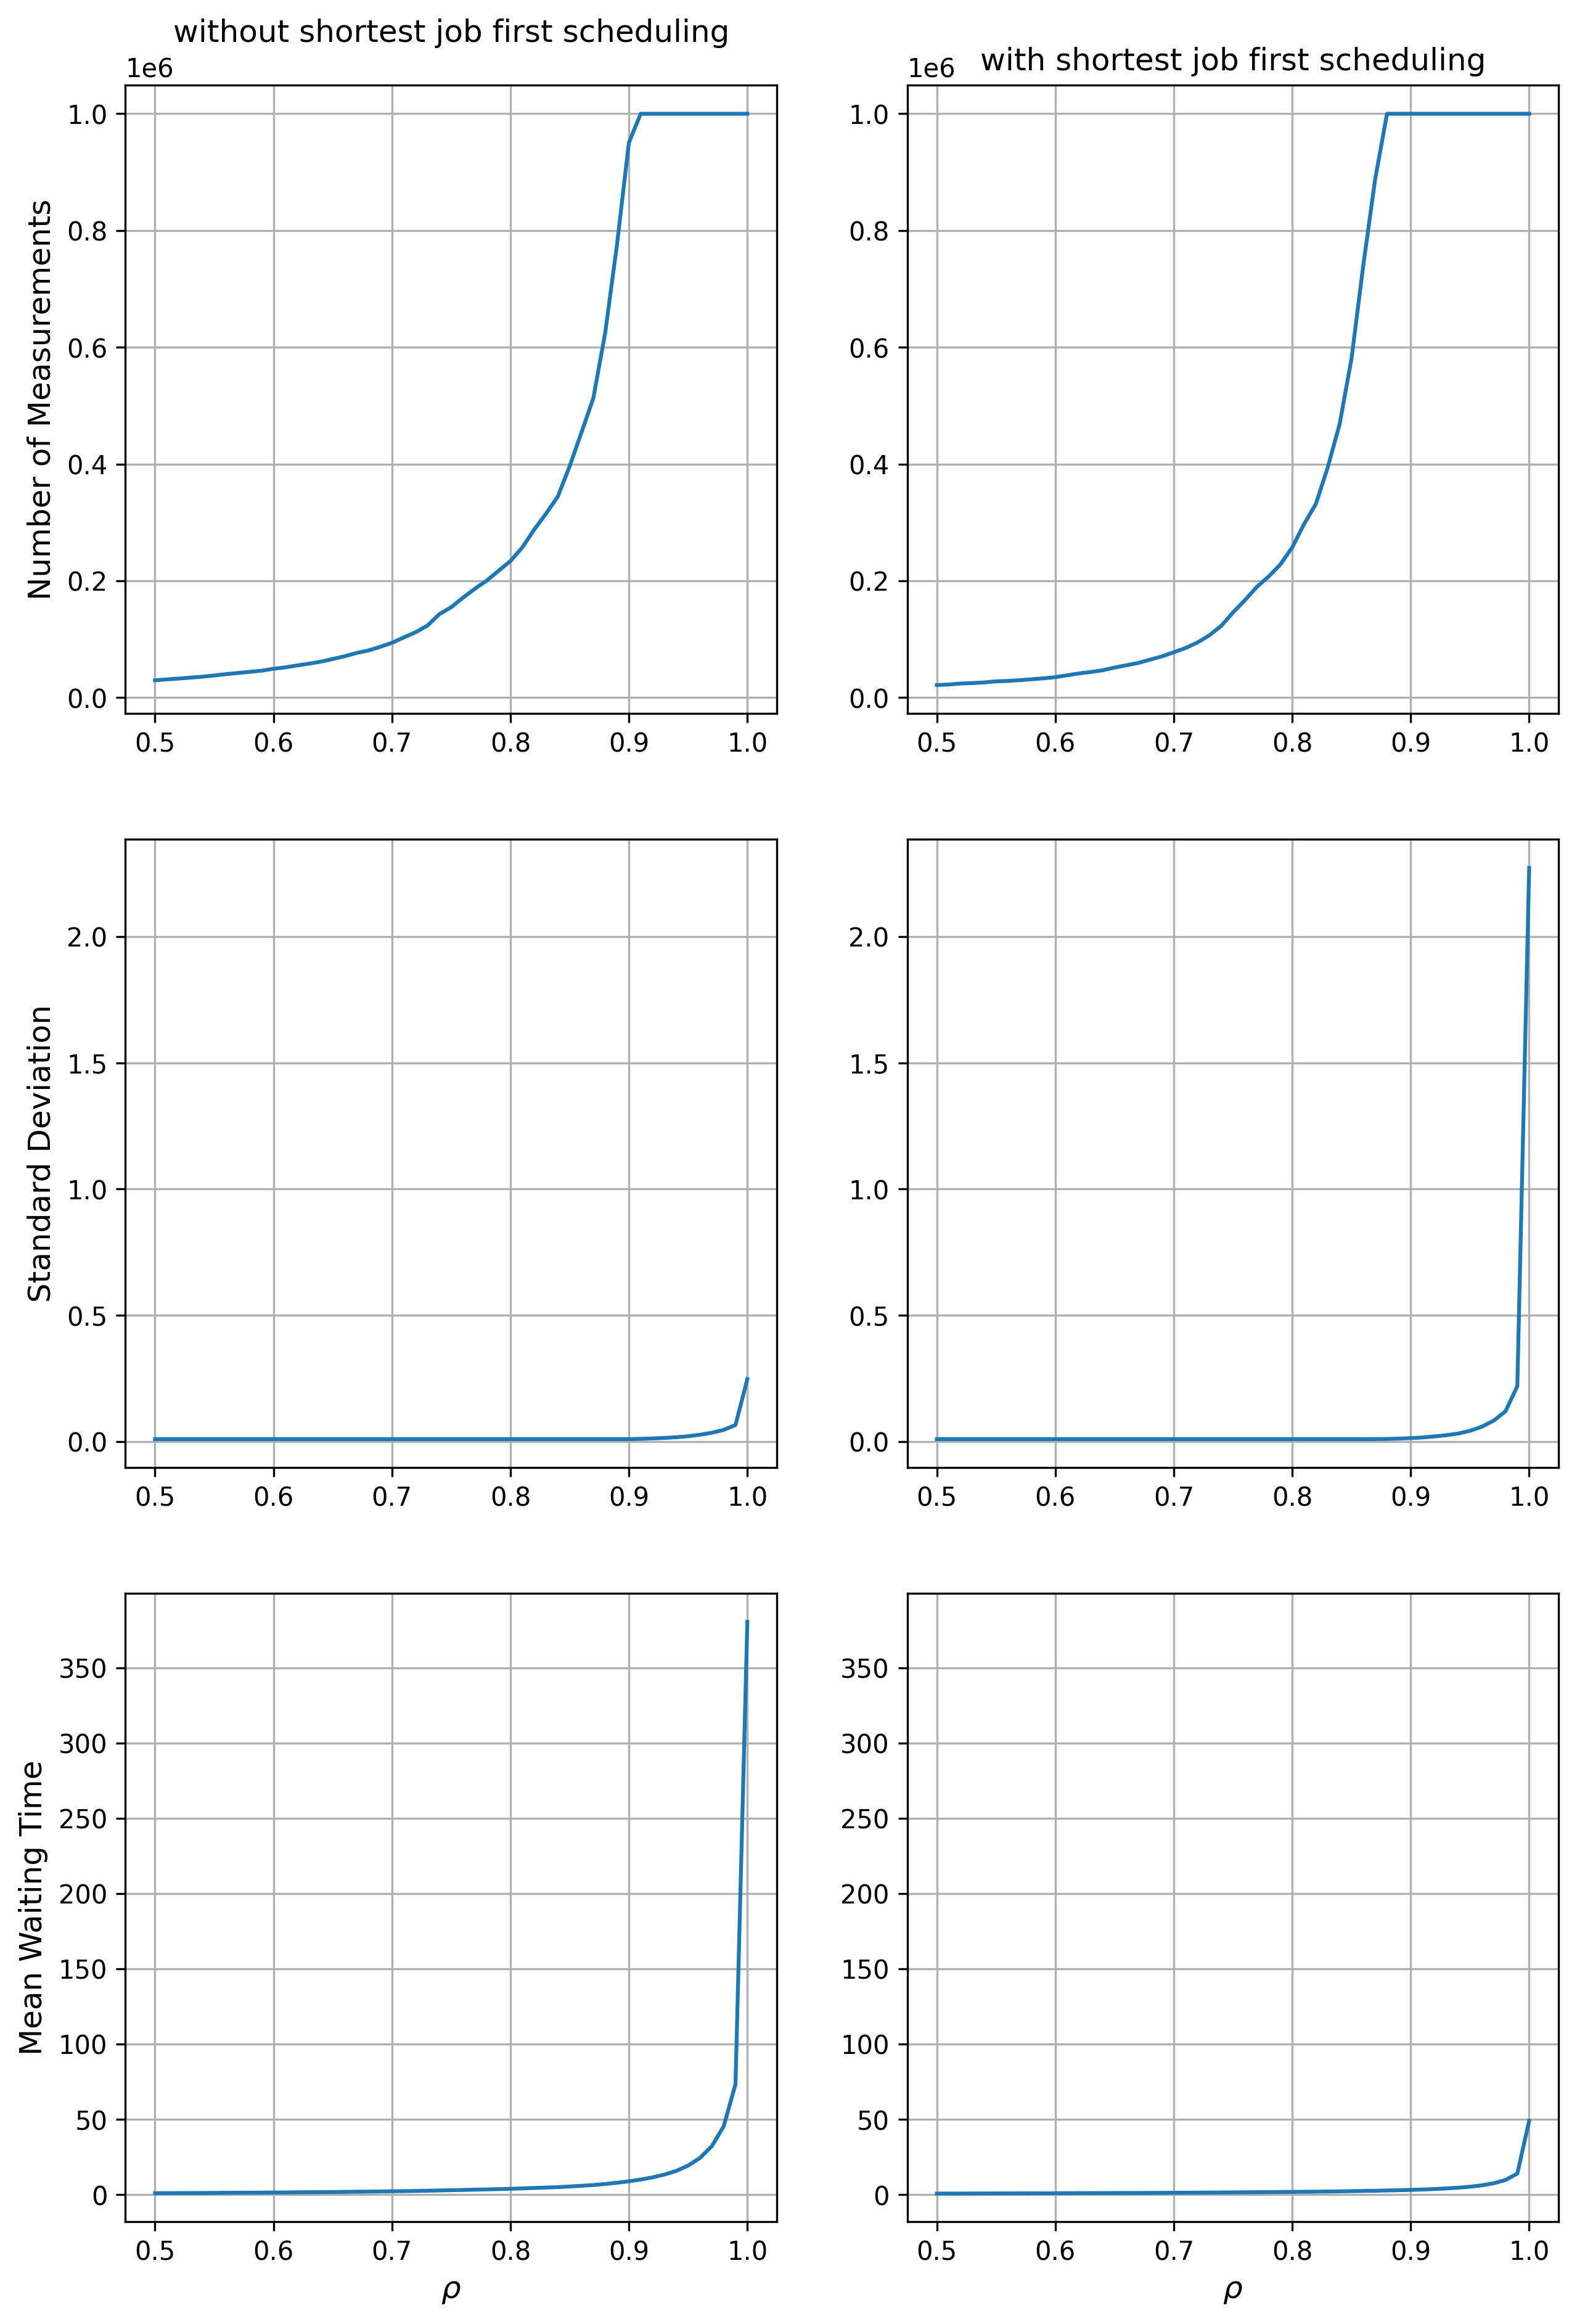

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
ax[0][0].plot(RHO, [len(l) for l in list_M_M_1])
ax[1][0].plot(RHO, stds_M_M_1)
ax[2][0].plot(RHO, means_M_M_1)
ax[0][1].plot(RHO, [len(l) for l in list_M_M_1_shortest_job_first])
ax[1][1].plot(RHO, stds_M_M_1_shortest_job_first)
ax[2][1].plot(RHO, means_M_M_1_shortest_job_first)

ax[0][0].set_title("without shortest job first scheduling")
ax[0][1].set_title("with shortest job first scheduling")

ax[0][0].set_ylabel("Number of Measurements", fontsize=12)
ax[1][0].set_ylabel("Standard Deviation", fontsize=12)
ax[2][0].set_ylabel("Mean Waiting Time", fontsize=12)

ax[2][0].set_xlabel(r"$\rho$", fontsize=12)
ax[2][1].set_xlabel(r"$\rho$", fontsize=12)

for i in range(3):
    for j in range(2):
        ax[i][j].grid(True)

row_0_ymin = min(ax[0][i].get_ylim()[0] for i in range(2))
row_0_ymax = max(ax[0][i].get_ylim()[1] for i in range(2))
for i in range(2):
    ax[0][i].set_ylim(row_0_ymin, row_0_ymax)

row_1_ymin = min(ax[1][i].get_ylim()[0] for i in range(2))
row_1_ymax = max(ax[1][i].get_ylim()[1] for i in range(2))
for i in range(2):
    ax[1][i].set_ylim(row_1_ymin, row_1_ymax)

row_2_ymin = min(ax[2][i].get_ylim()[0] for i in range(2))
row_2_ymax = max(ax[2][i].get_ylim()[1] for i in range(2))
for i in range(2):
    ax[2][i].set_ylim(row_2_ymin, row_2_ymax)

#fig.suptitle("Shortest job first scheduling", fontsize=16)

plt.show()

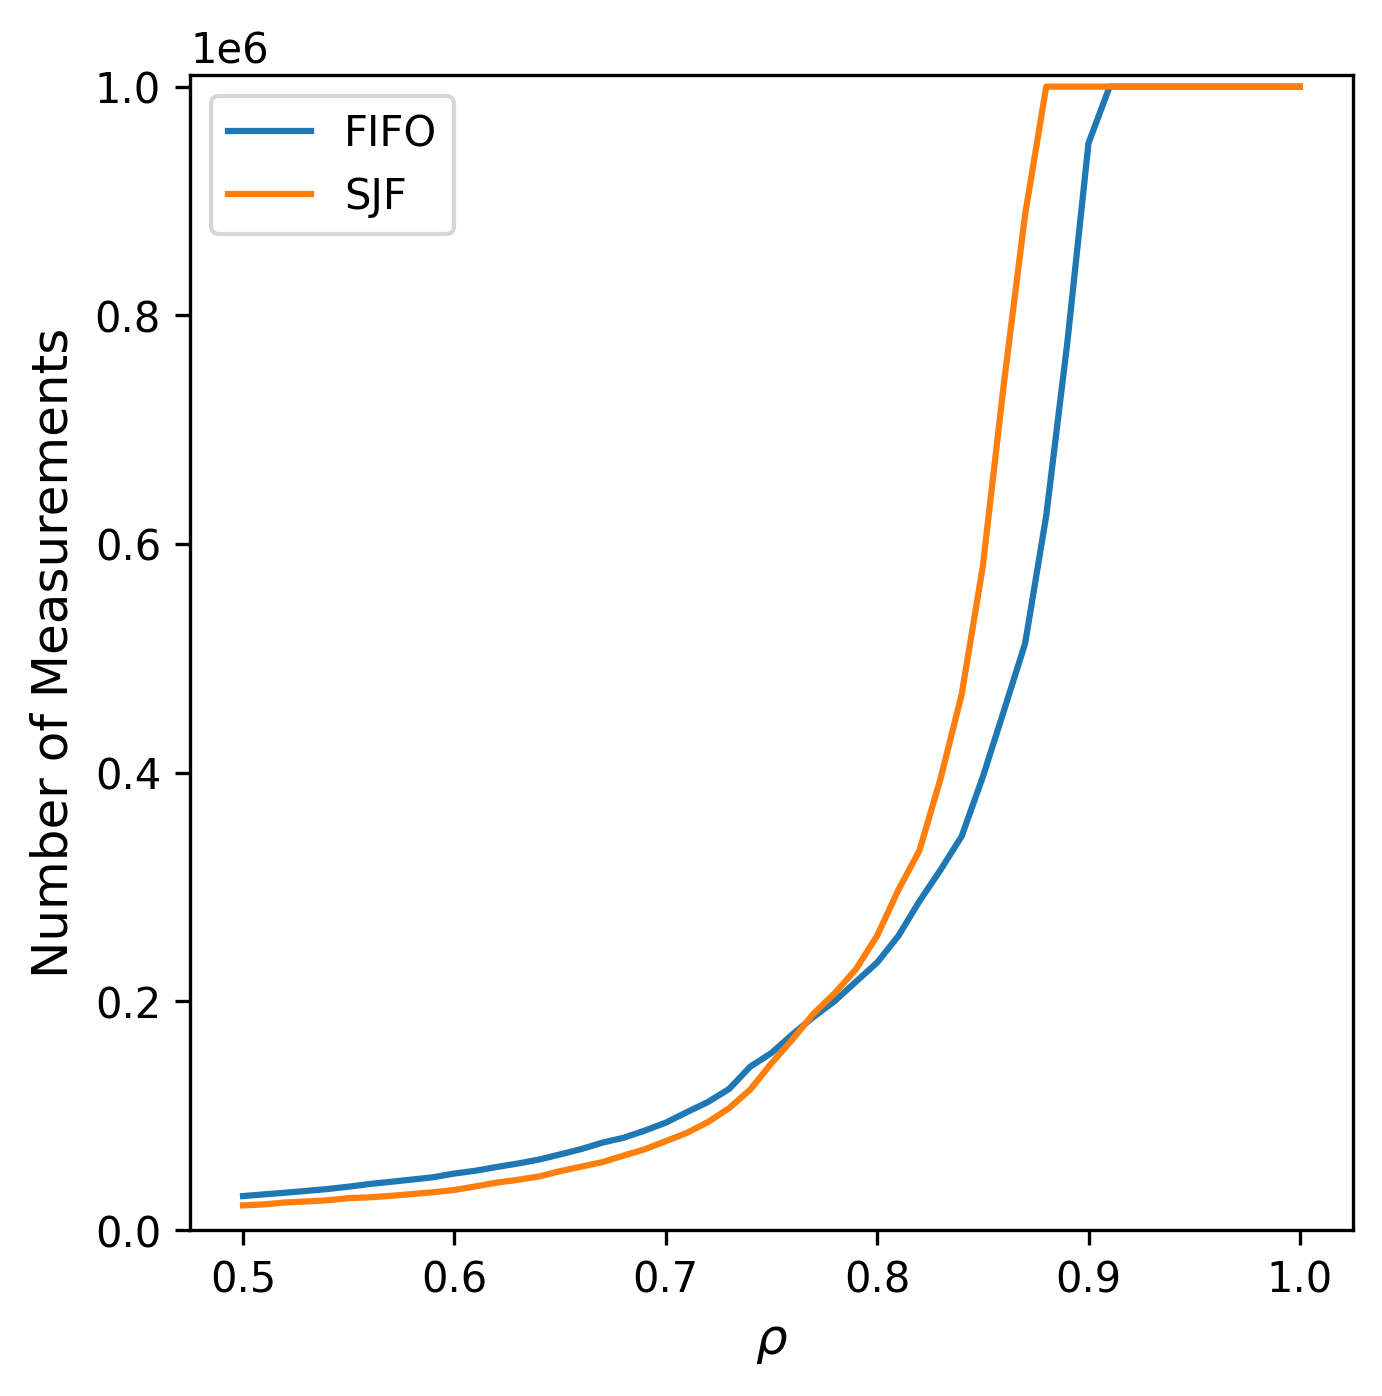

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, [len(l) for l in list_M_M_1], label="FIFO")
ax.plot(RHO, [len(l) for l in list_M_M_1_shortest_job_first], label="SJF")

ax.set_ylabel("Number of Measurements", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 1010000)
ax.legend()

plt.show()

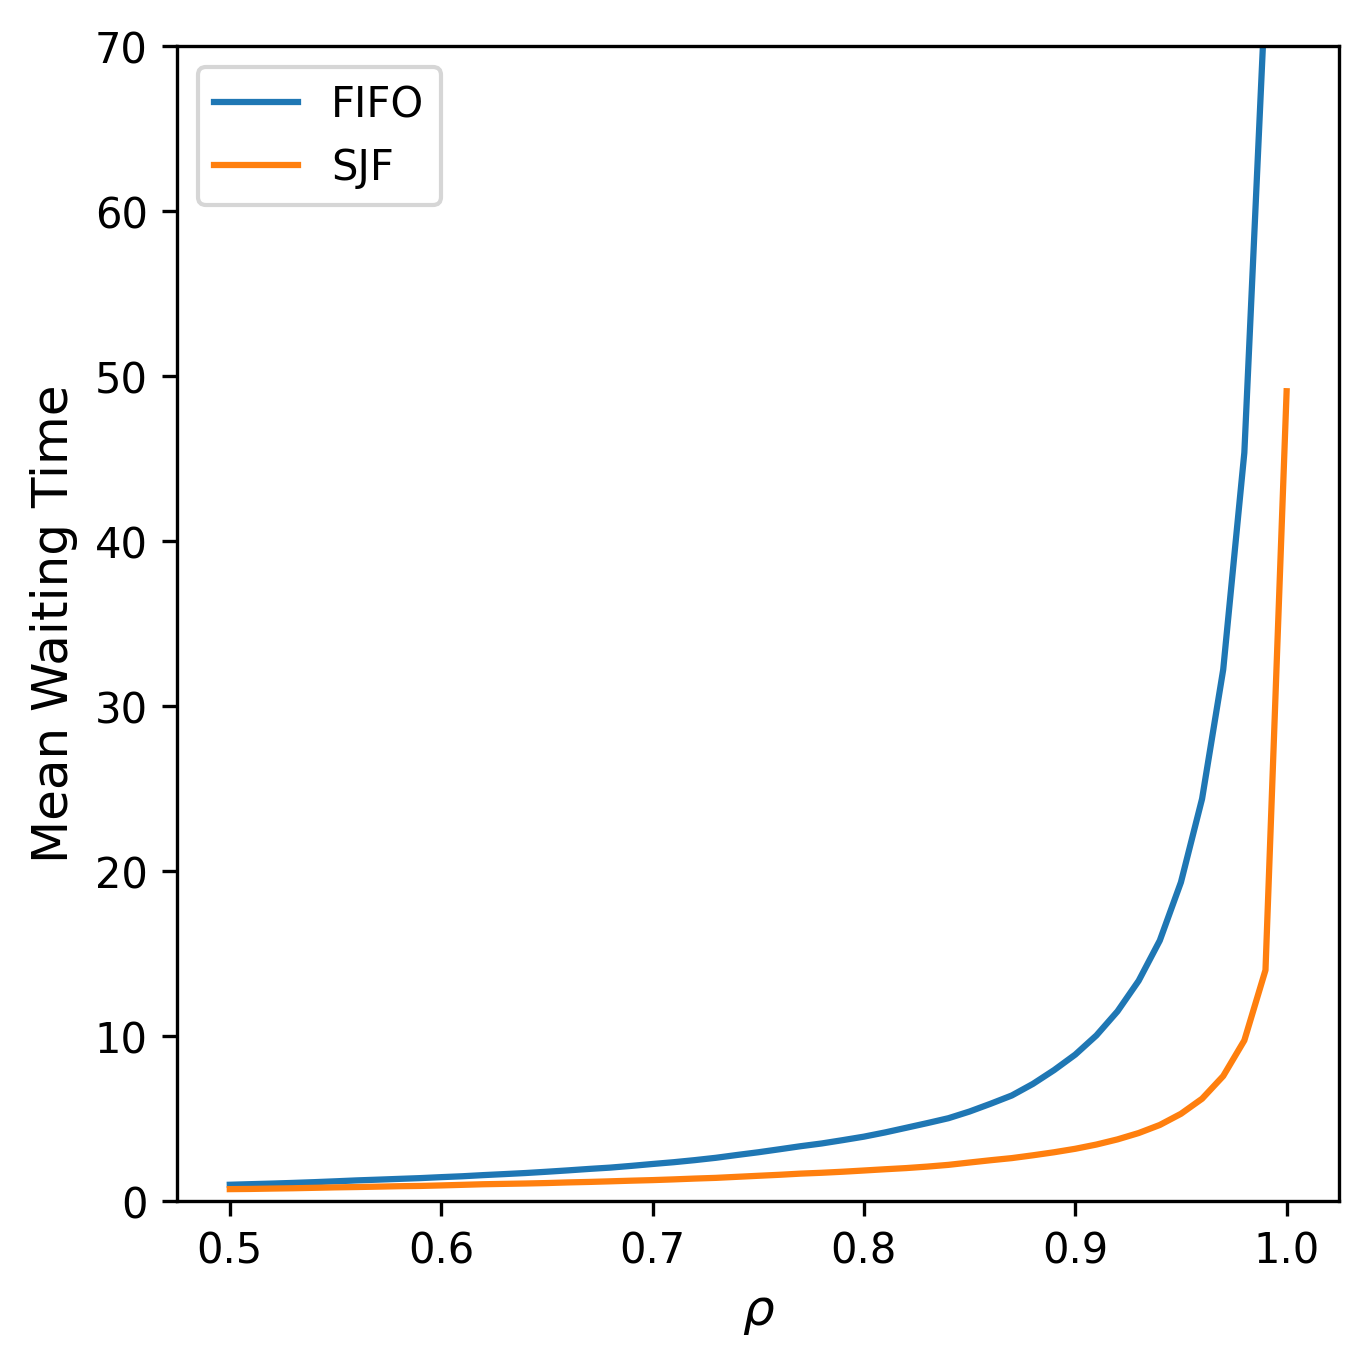

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, means_M_M_1, label="FIFO")
ax.plot(RHO, means_M_M_1_shortest_job_first, label="SJF")

ax.set_ylabel("Mean Waiting Time", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 70)
ax.legend()

plt.show()

## M/D/n queues

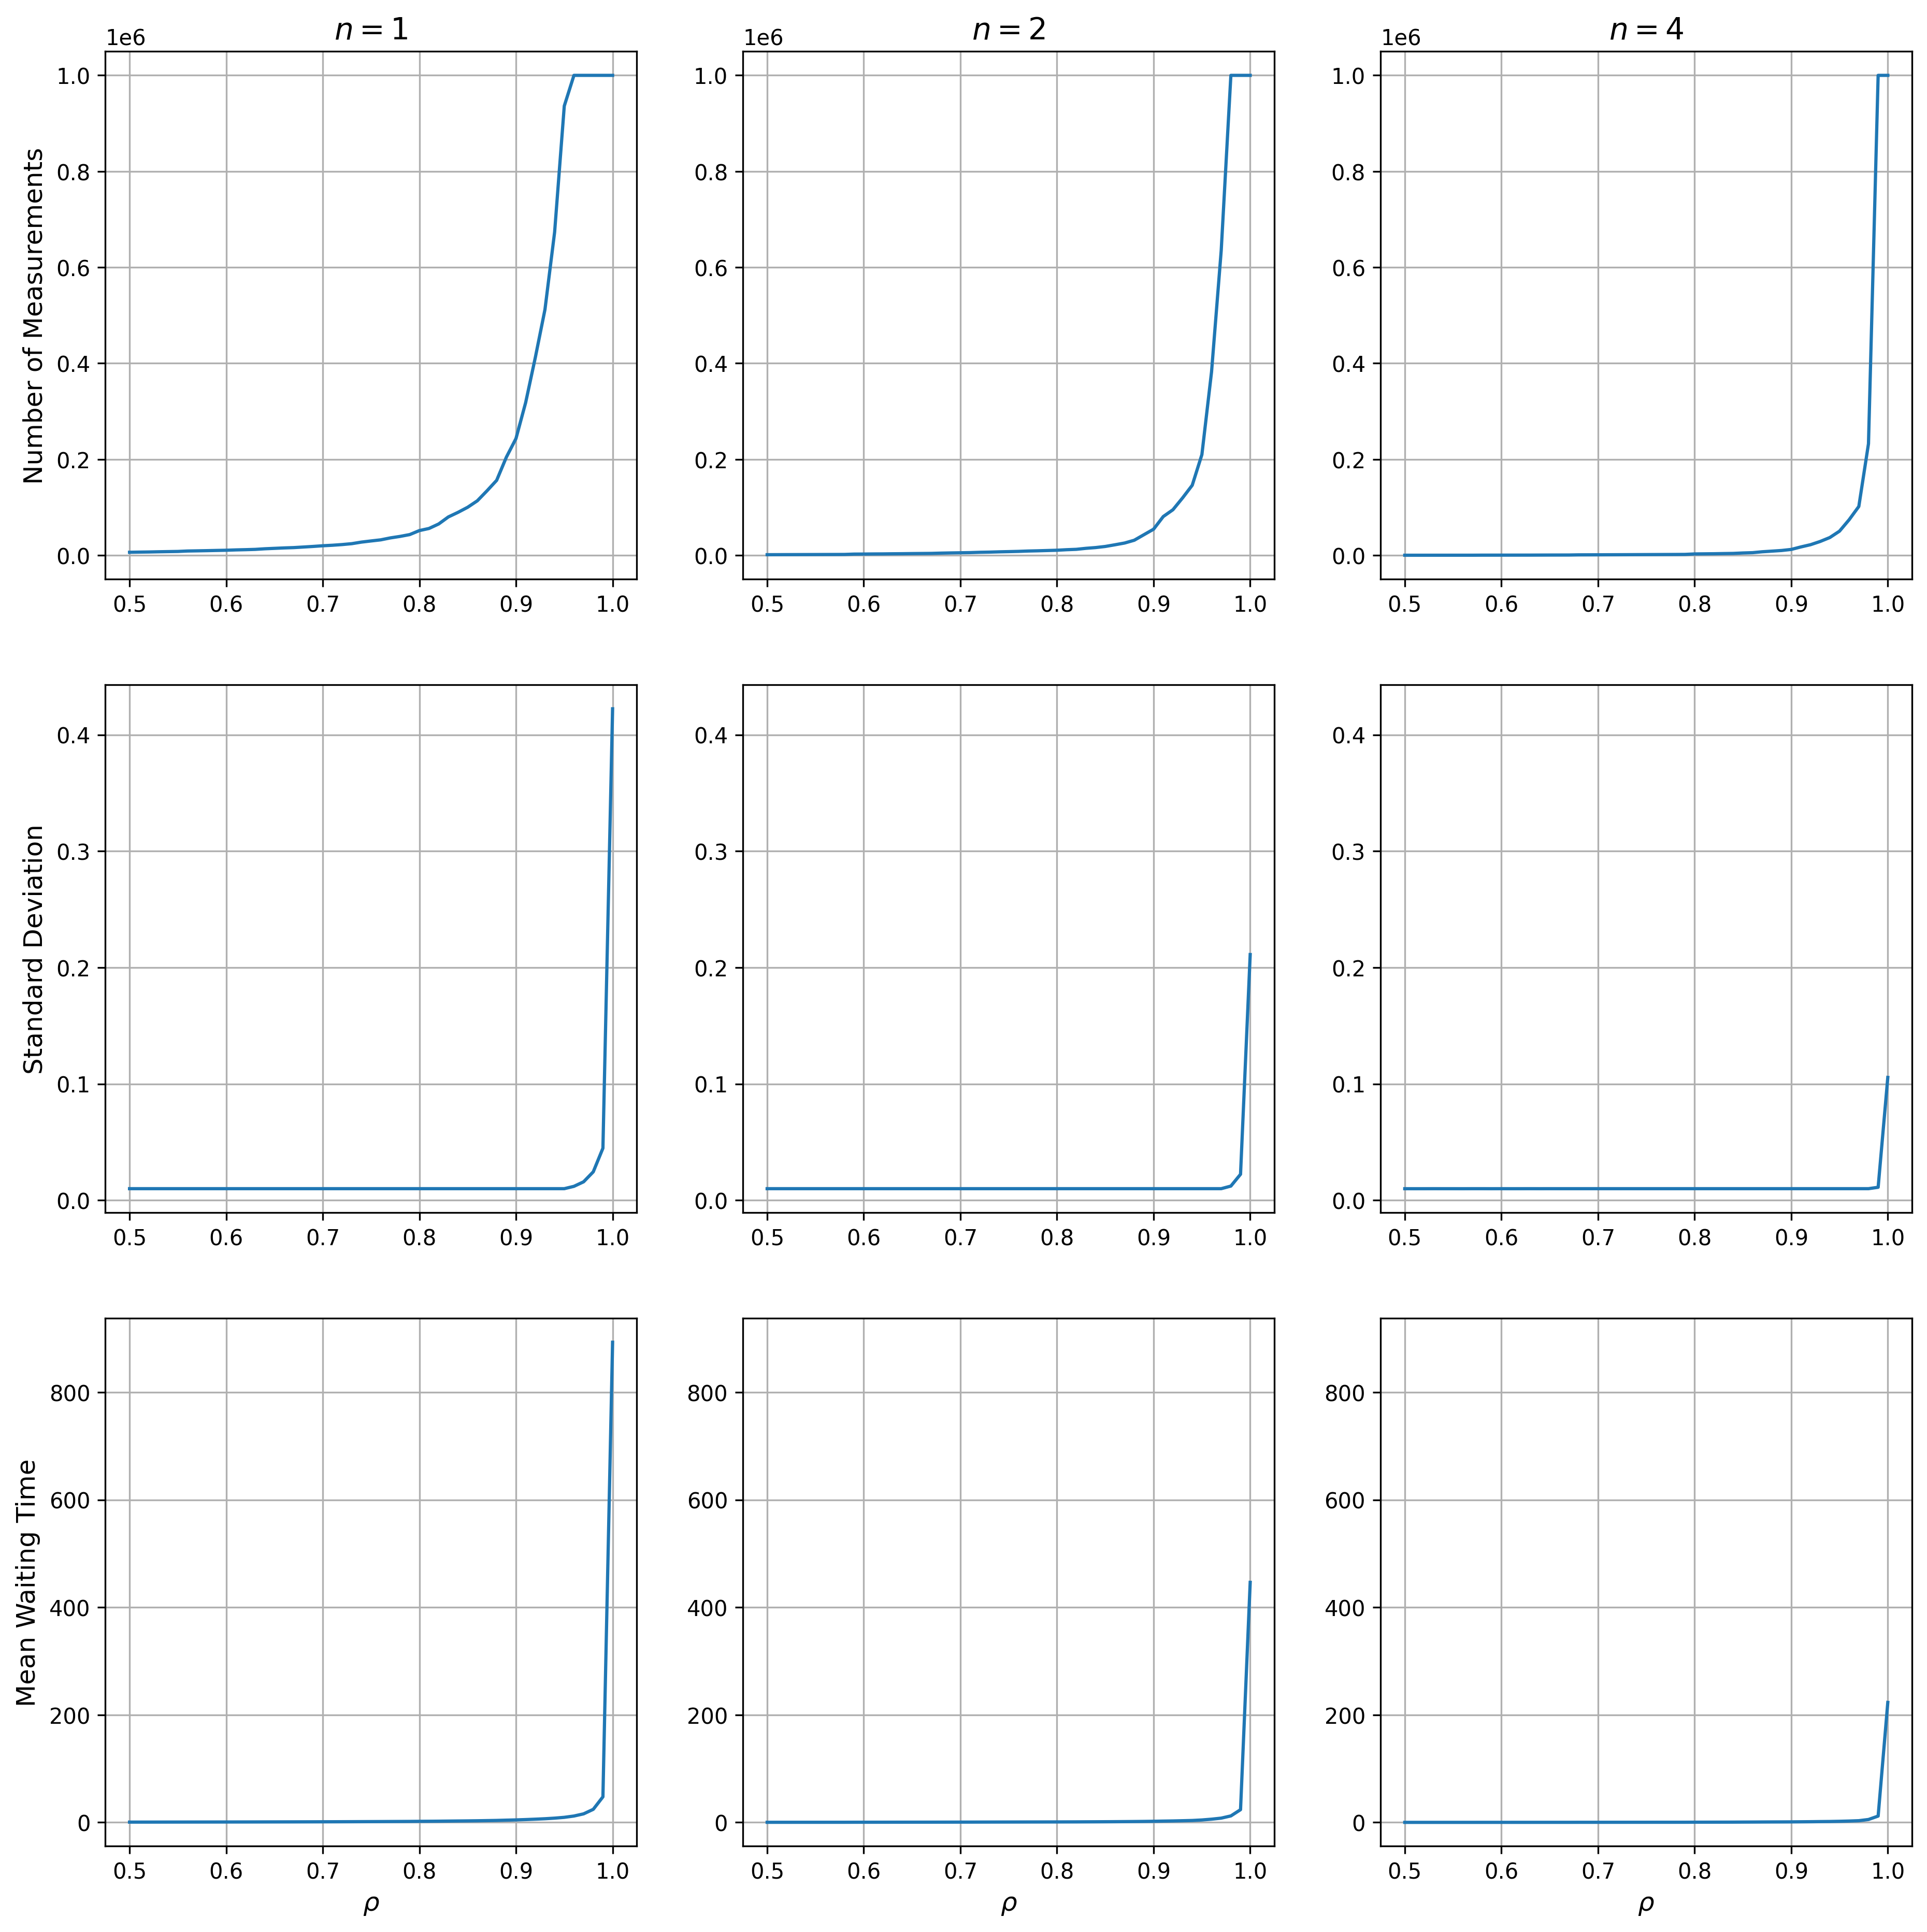

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[0][0].plot(RHO, [len(l) for l in list_M_D_1])
ax[1][0].plot(RHO, stds_M_D_1)
ax[2][0].plot(RHO, means_M_D_1)
ax[0][1].plot(RHO, [len(l) for l in list_M_D_2])
ax[1][1].plot(RHO, stds_M_D_2)
ax[2][1].plot(RHO, means_M_D_2)
ax[0][2].plot(RHO, [len(l) for l in list_M_D_4])
ax[1][2].plot(RHO, stds_M_D_4)
ax[2][2].plot(RHO, means_M_D_4)

ax[0][0].set_title(r"$n=1$", fontsize=14)
ax[0][1].set_title(r"$n=2$", fontsize=14)
ax[0][2].set_title(r"$n=4$", fontsize=14)

ax[0][0].set_ylabel("Number of Measurements", fontsize=12)
ax[1][0].set_ylabel("Standard Deviation", fontsize=12)
ax[2][0].set_ylabel("Mean Waiting Time", fontsize=12)

ax[2][0].set_xlabel(r"$\rho$", fontsize=12)
ax[2][1].set_xlabel(r"$\rho$", fontsize=12)
ax[2][2].set_xlabel(r"$\rho$", fontsize=12)

for i in range(3):
    for j in range(3):
        ax[i][j].grid(True)

row_0_ymin = min(ax[0][i].get_ylim()[0] for i in range(3))
row_0_ymax = max(ax[0][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[0][i].set_ylim(row_0_ymin, row_0_ymax)

row_1_ymin = min(ax[1][i].get_ylim()[0] for i in range(3))
row_1_ymax = max(ax[1][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[1][i].set_ylim(row_1_ymin, row_1_ymax)

row_2_ymin = min(ax[2][i].get_ylim()[0] for i in range(3))
row_2_ymax = max(ax[2][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[2][i].set_ylim(row_2_ymin, row_2_ymax)

#fig.suptitle("M/D/n queues", fontsize=16)

plt.show()

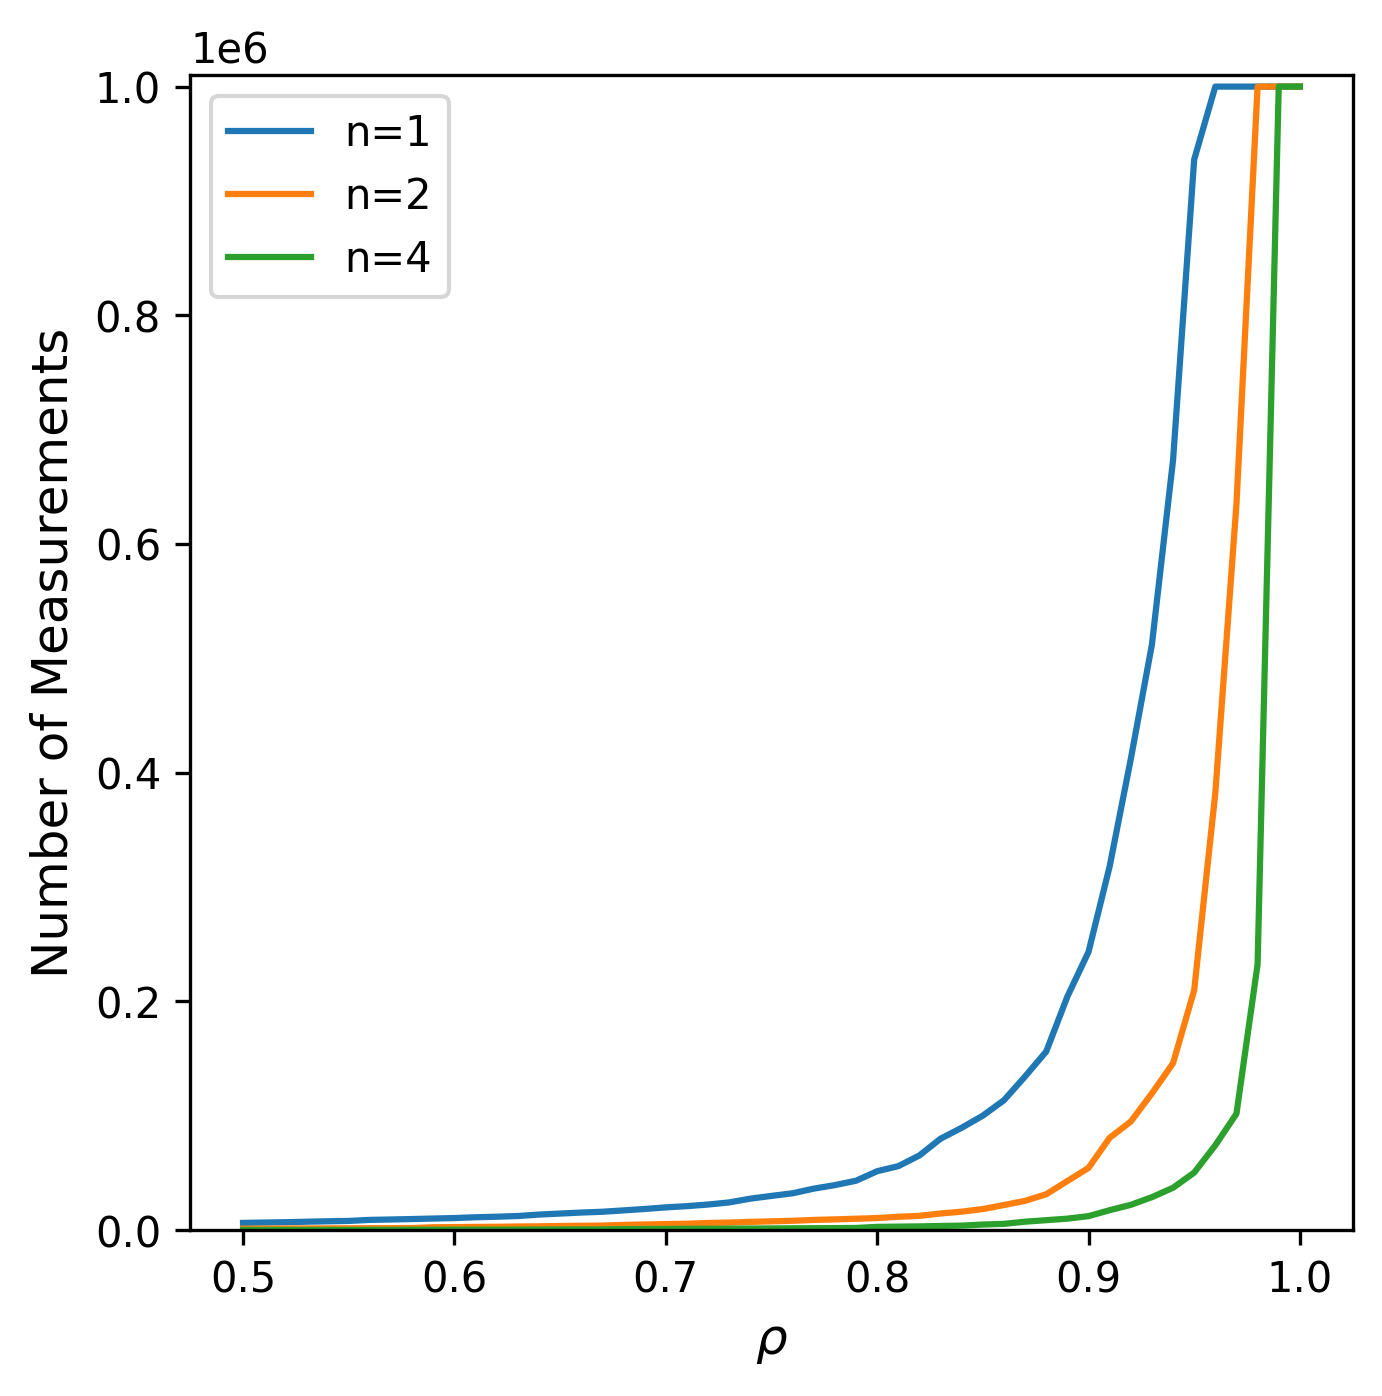

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, [len(l) for l in list_M_D_1], label="n=1")
ax.plot(RHO, [len(l) for l in list_M_D_2], label="n=2")
ax.plot(RHO, [len(l) for l in list_M_D_4], label="n=4")

ax.set_ylabel("Number of Measurements", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 1010000)
ax.legend()

plt.show()

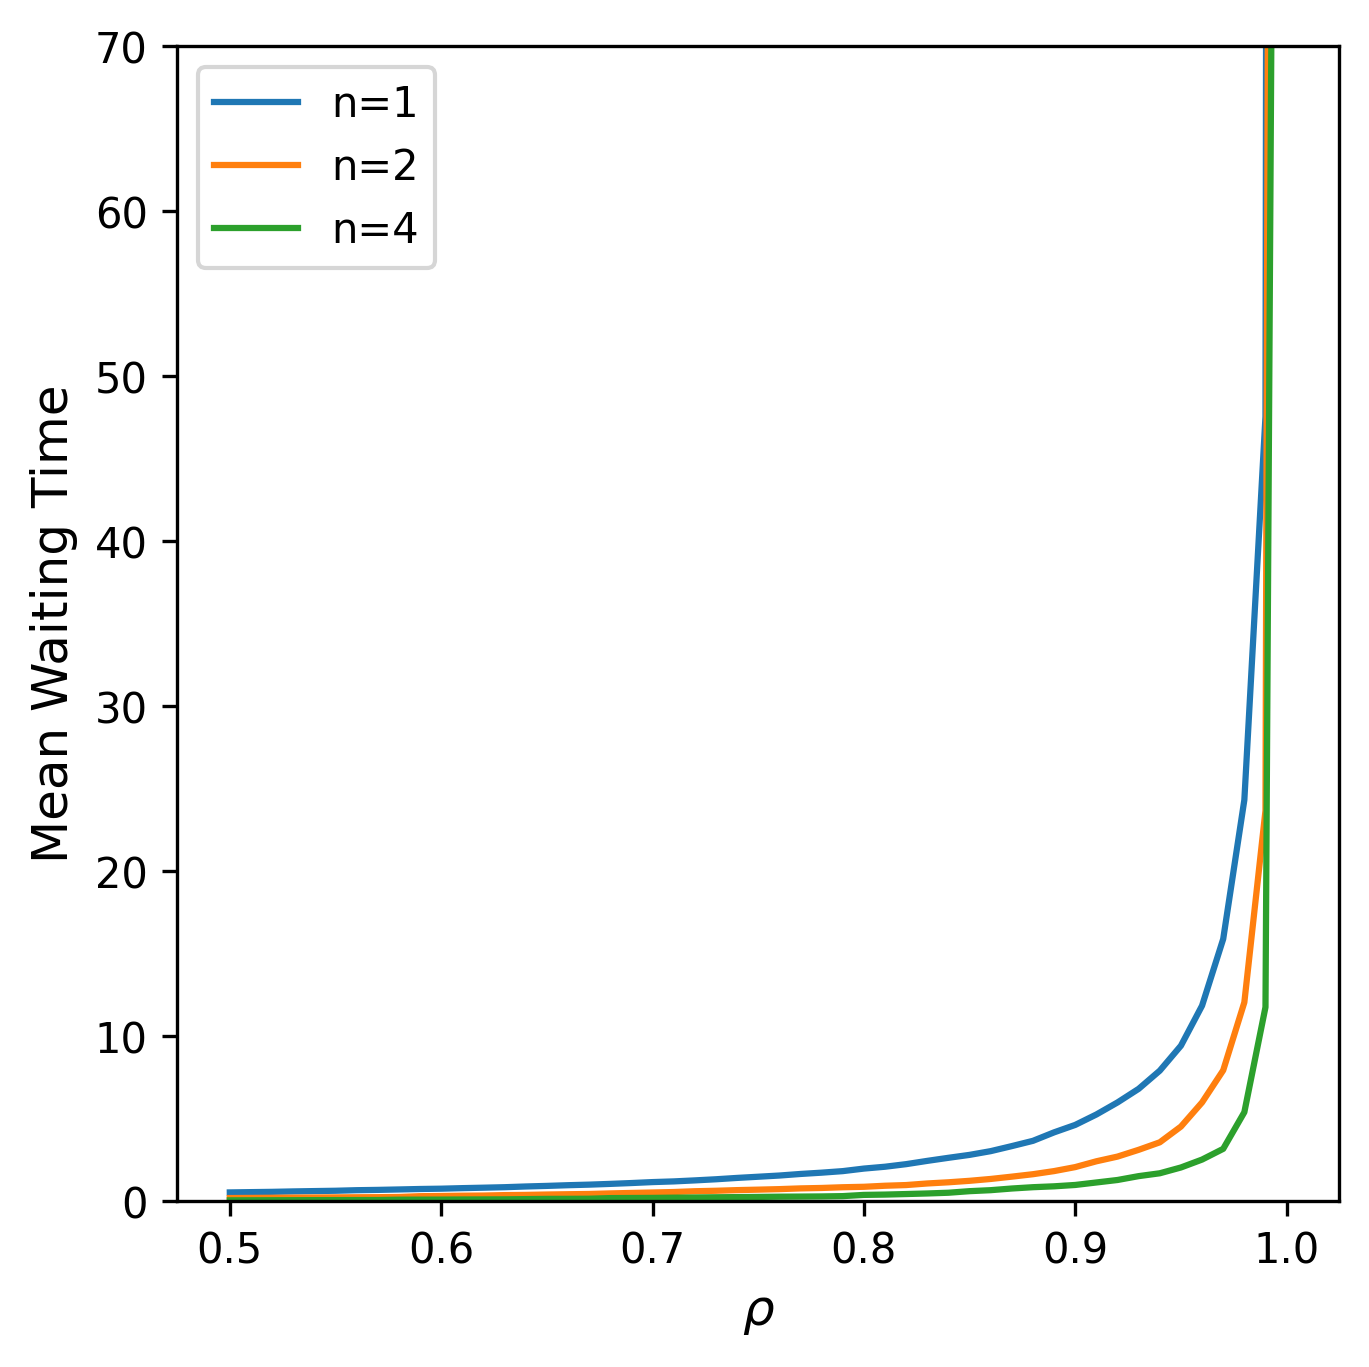

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, means_M_D_1, label="n=1")
ax.plot(RHO, means_M_D_2, label="n=2")
ax.plot(RHO, means_M_D_4, label="n=4")

ax.set_ylabel("Mean Waiting Time", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 70)
ax.legend()

plt.show()

## M/H/n queues

[101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 120, 125, 130, 134, 139, 143, 150, 156, 161, 167, 174, 182, 191, 201, 209, 217, 226, 235, 271, 285, 294, 304, 313, 322, 331, 340, 349, 407, 419, 431, 448]


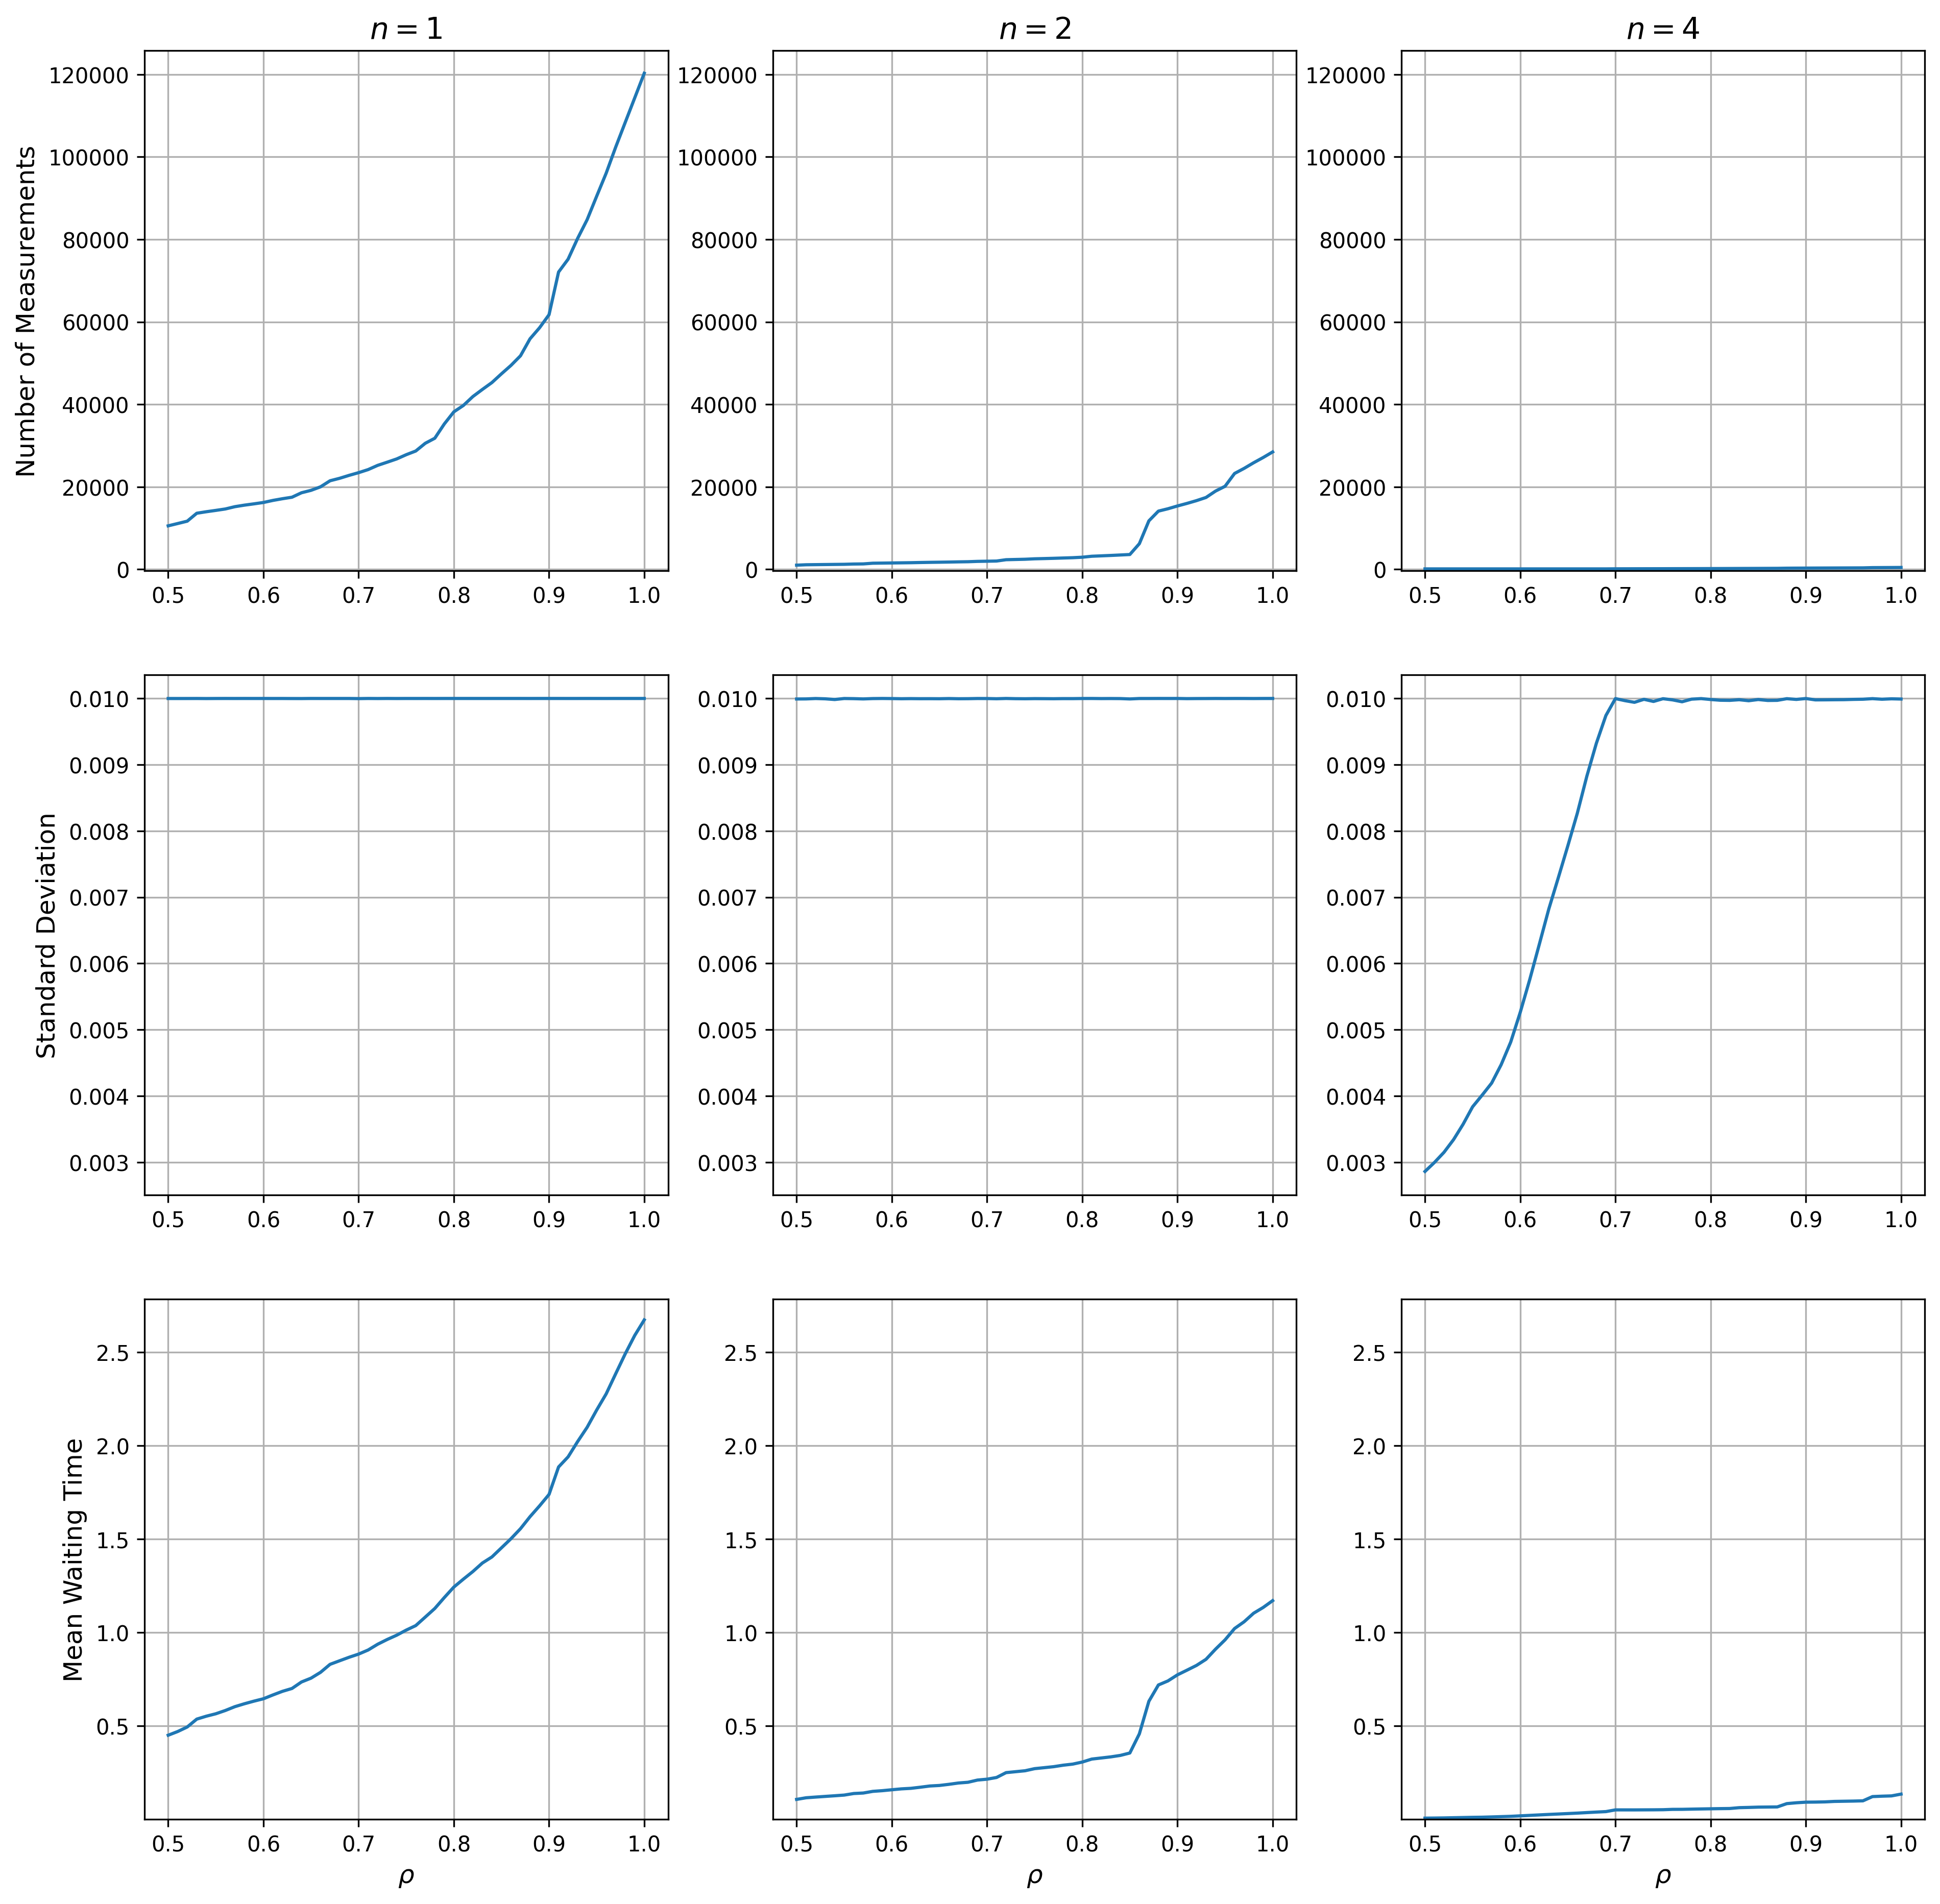

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[0][0].plot(RHO, [len(l) for l in list_M_H_1])
ax[1][0].plot(RHO, stds_M_H_1)
ax[2][0].plot(RHO, means_M_H_1)
ax[0][1].plot(RHO, [len(l) for l in list_M_H_2])
ax[1][1].plot(RHO, stds_M_H_2)
ax[2][1].plot(RHO, means_M_H_2)
ax[0][2].plot(RHO, [len(l) for l in list_M_H_4])
print([len(l) for l in list_M_H_4])
ax[1][2].plot(RHO, stds_M_H_4)
ax[2][2].plot(RHO, means_M_H_4)

ax[0][0].set_title(r"$n=1$", fontsize=14)
ax[0][1].set_title(r"$n=2$", fontsize=14)
ax[0][2].set_title(r"$n=4$", fontsize=14)

ax[0][0].set_ylabel("Number of Measurements", fontsize=12)
ax[1][0].set_ylabel("Standard Deviation", fontsize=12)
ax[2][0].set_ylabel("Mean Waiting Time", fontsize=12)

ax[2][0].set_xlabel(r"$\rho$", fontsize=12)
ax[2][1].set_xlabel(r"$\rho$", fontsize=12)
ax[2][2].set_xlabel(r"$\rho$", fontsize=12)

for i in range(3):
    for j in range(3):
        ax[i][j].grid(True)

row_0_ymin = min(ax[0][i].get_ylim()[0] for i in range(3))
row_0_ymax = max(ax[0][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[0][i].set_ylim(row_0_ymin, row_0_ymax)

row_1_ymin = min(ax[1][i].get_ylim()[0] for i in range(3))
row_1_ymax = max(ax[1][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[1][i].set_ylim(row_1_ymin, row_1_ymax)

row_2_ymin = min(ax[2][i].get_ylim()[0] for i in range(3))
row_2_ymax = max(ax[2][i].get_ylim()[1] for i in range(3))
for i in range(3):
    ax[2][i].set_ylim(row_2_ymin, row_2_ymax)

#fig.suptitle("M/H/n queues", fontsize=16)

plt.show()

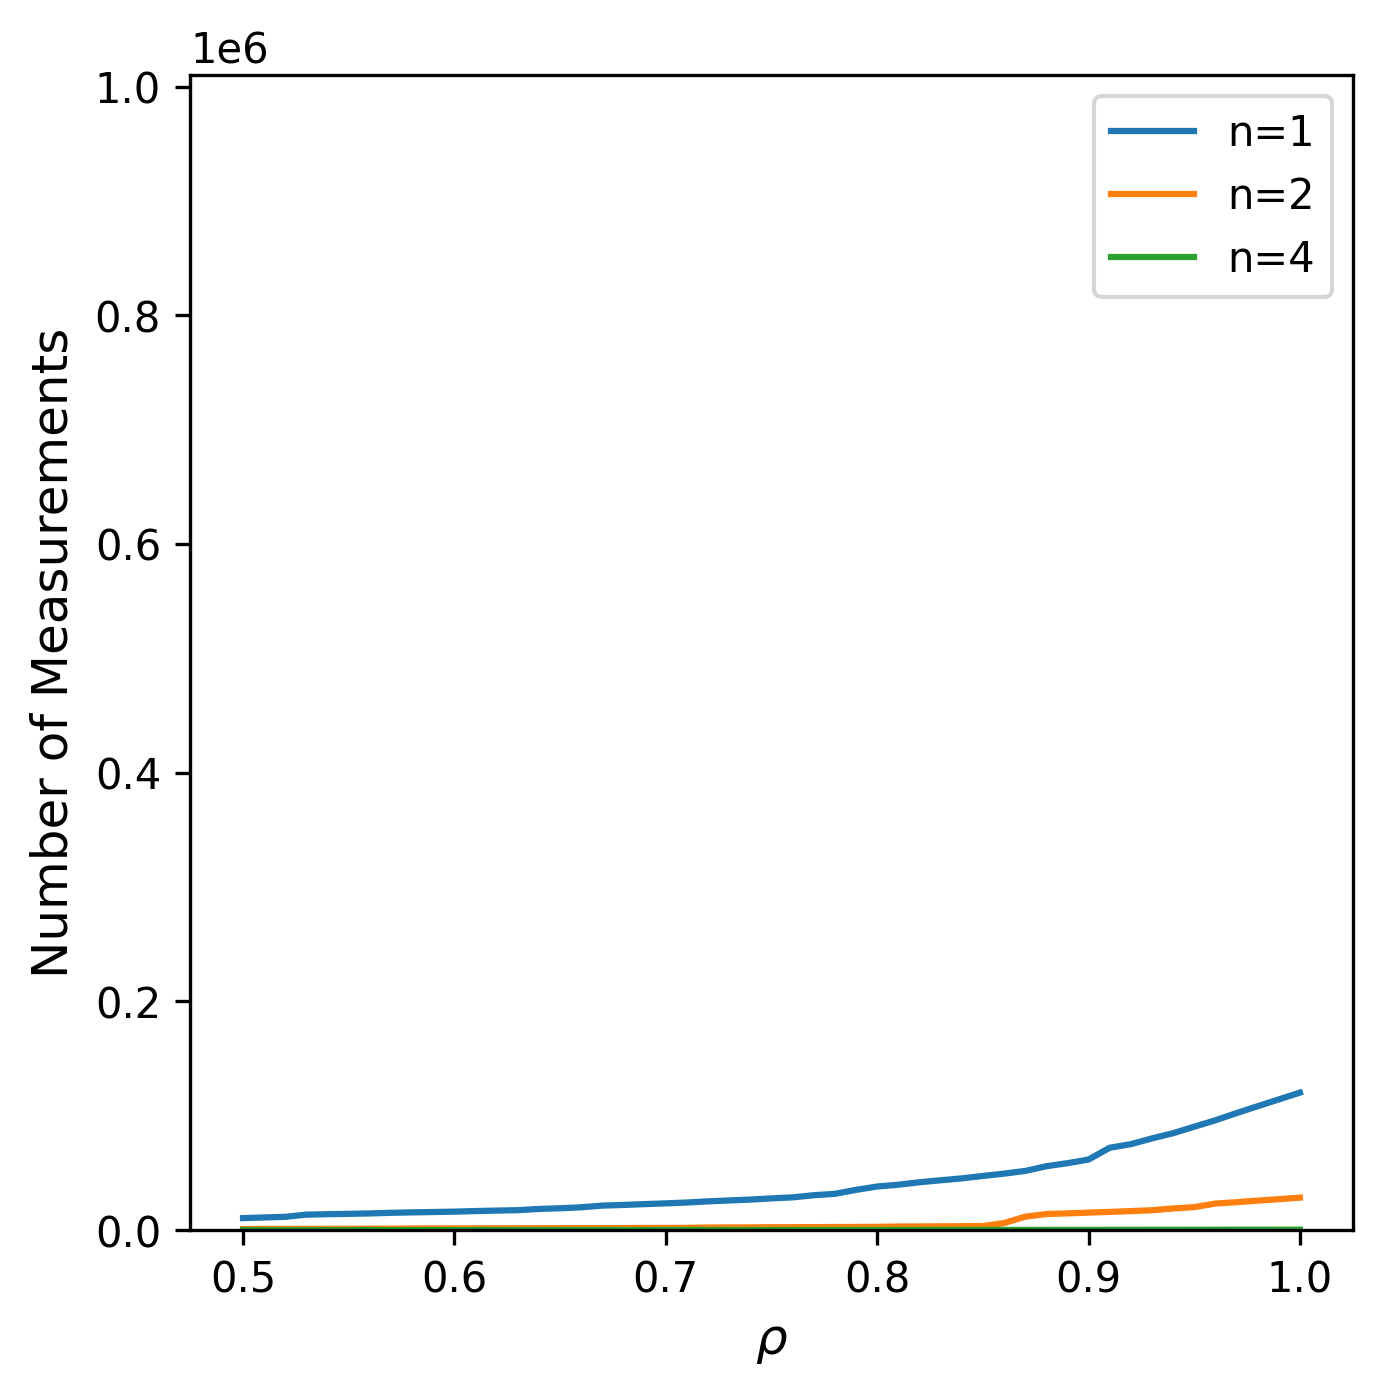

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, [len(l) for l in list_M_H_1], label="n=1")
ax.plot(RHO, [len(l) for l in list_M_H_2], label="n=2")
ax.plot(RHO, [len(l) for l in list_M_H_4], label="n=4")

ax.set_ylabel("Number of Measurements", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 1010000)
ax.legend()

plt.show()

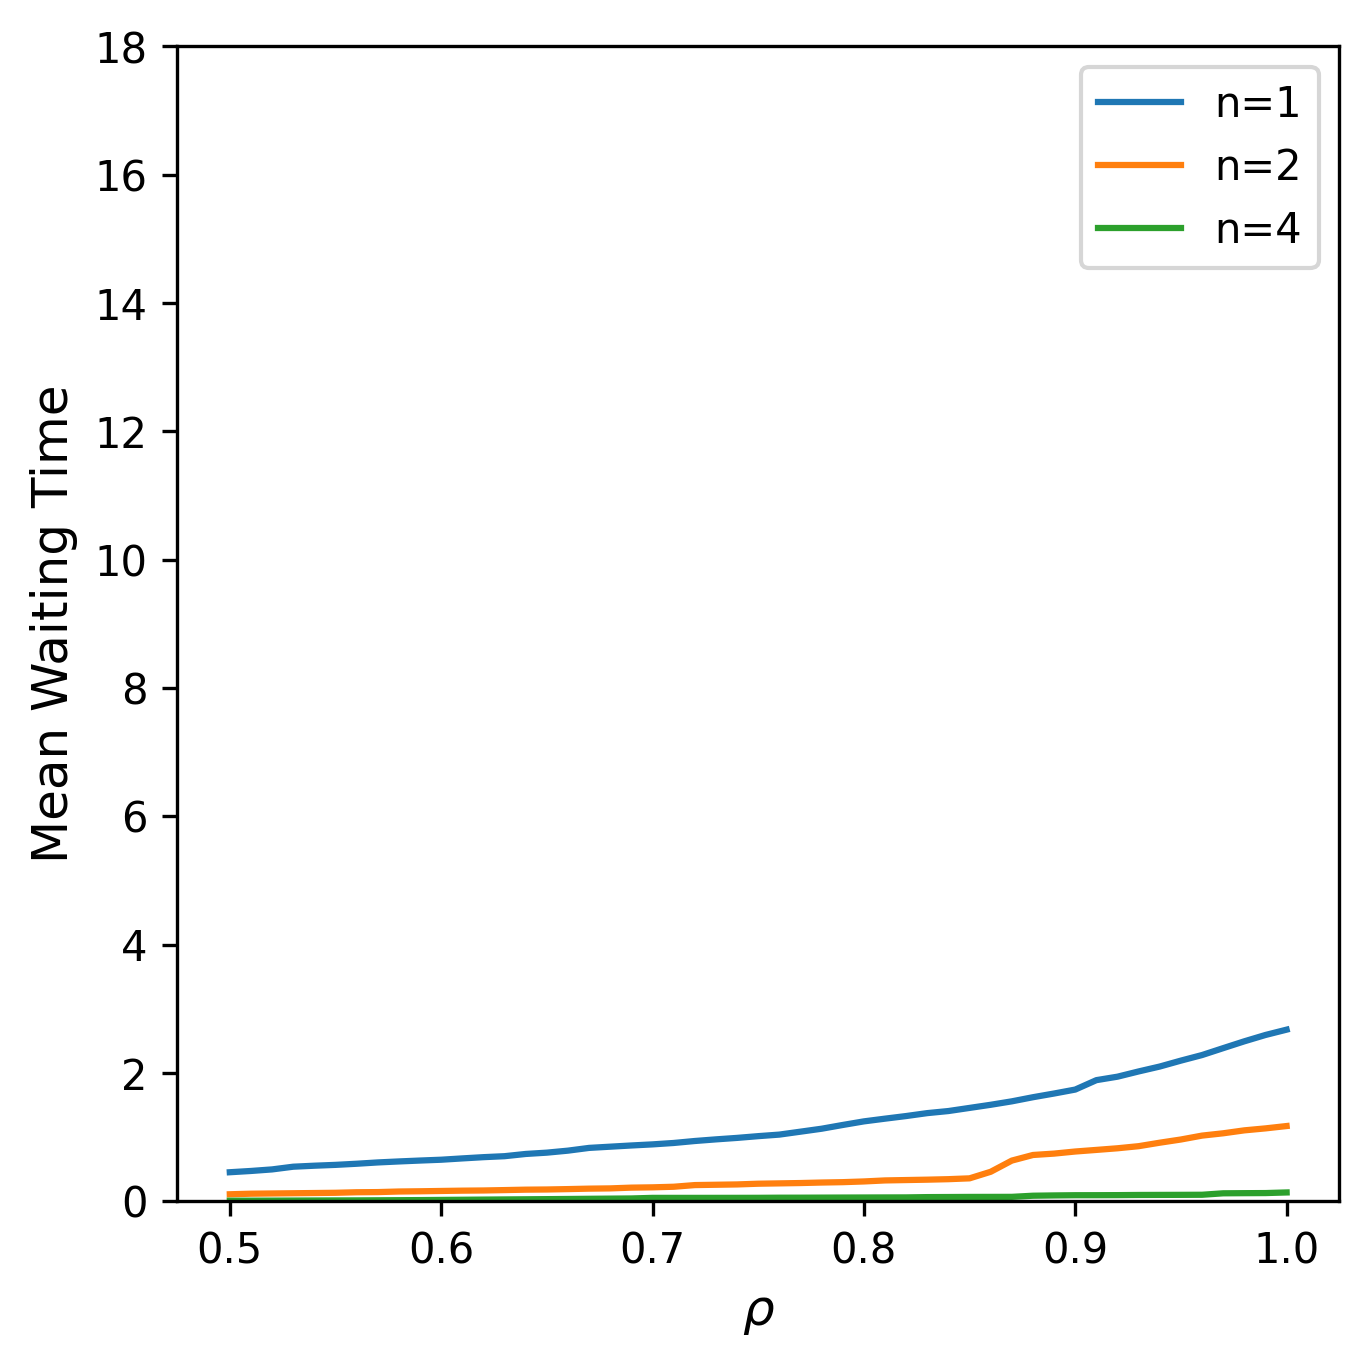

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, means_M_H_1, label="n=1")
ax.plot(RHO, means_M_H_2, label="n=2")
ax.plot(RHO, means_M_H_4, label="n=4")

ax.set_ylabel("Mean Waiting Time", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 18)
ax.legend()

plt.show()

ValueError: x and y must have same first dimension, but have shapes (51,) and (46,)

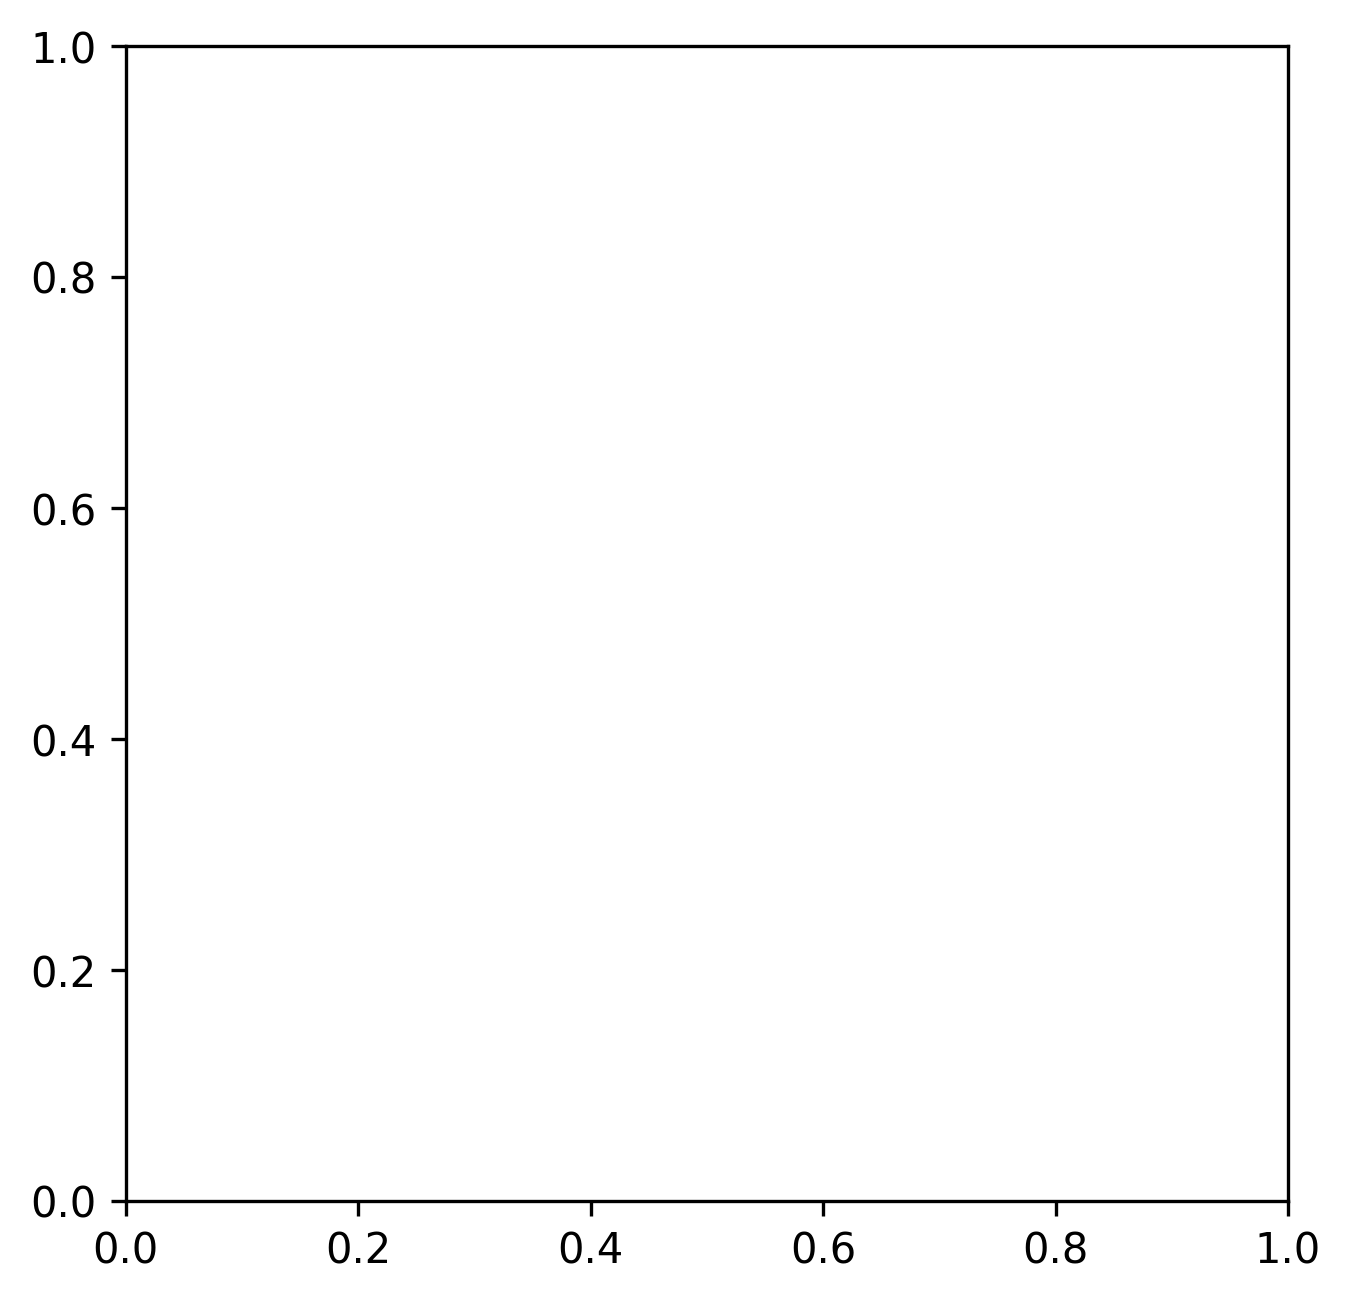

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, [len(l) for l in list_M_H_1_CorrectRate], label="n=1")
ax.plot(RHO, [len(l) for l in list_M_H_2_CorrectRate], label="n=2")
ax.plot(RHO, [len(l) for l in list_M_H_4_CorrectRate], label="n=4")

ax.set_ylabel("Number of Measurements", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 101000)
ax.legend()

plt.show()

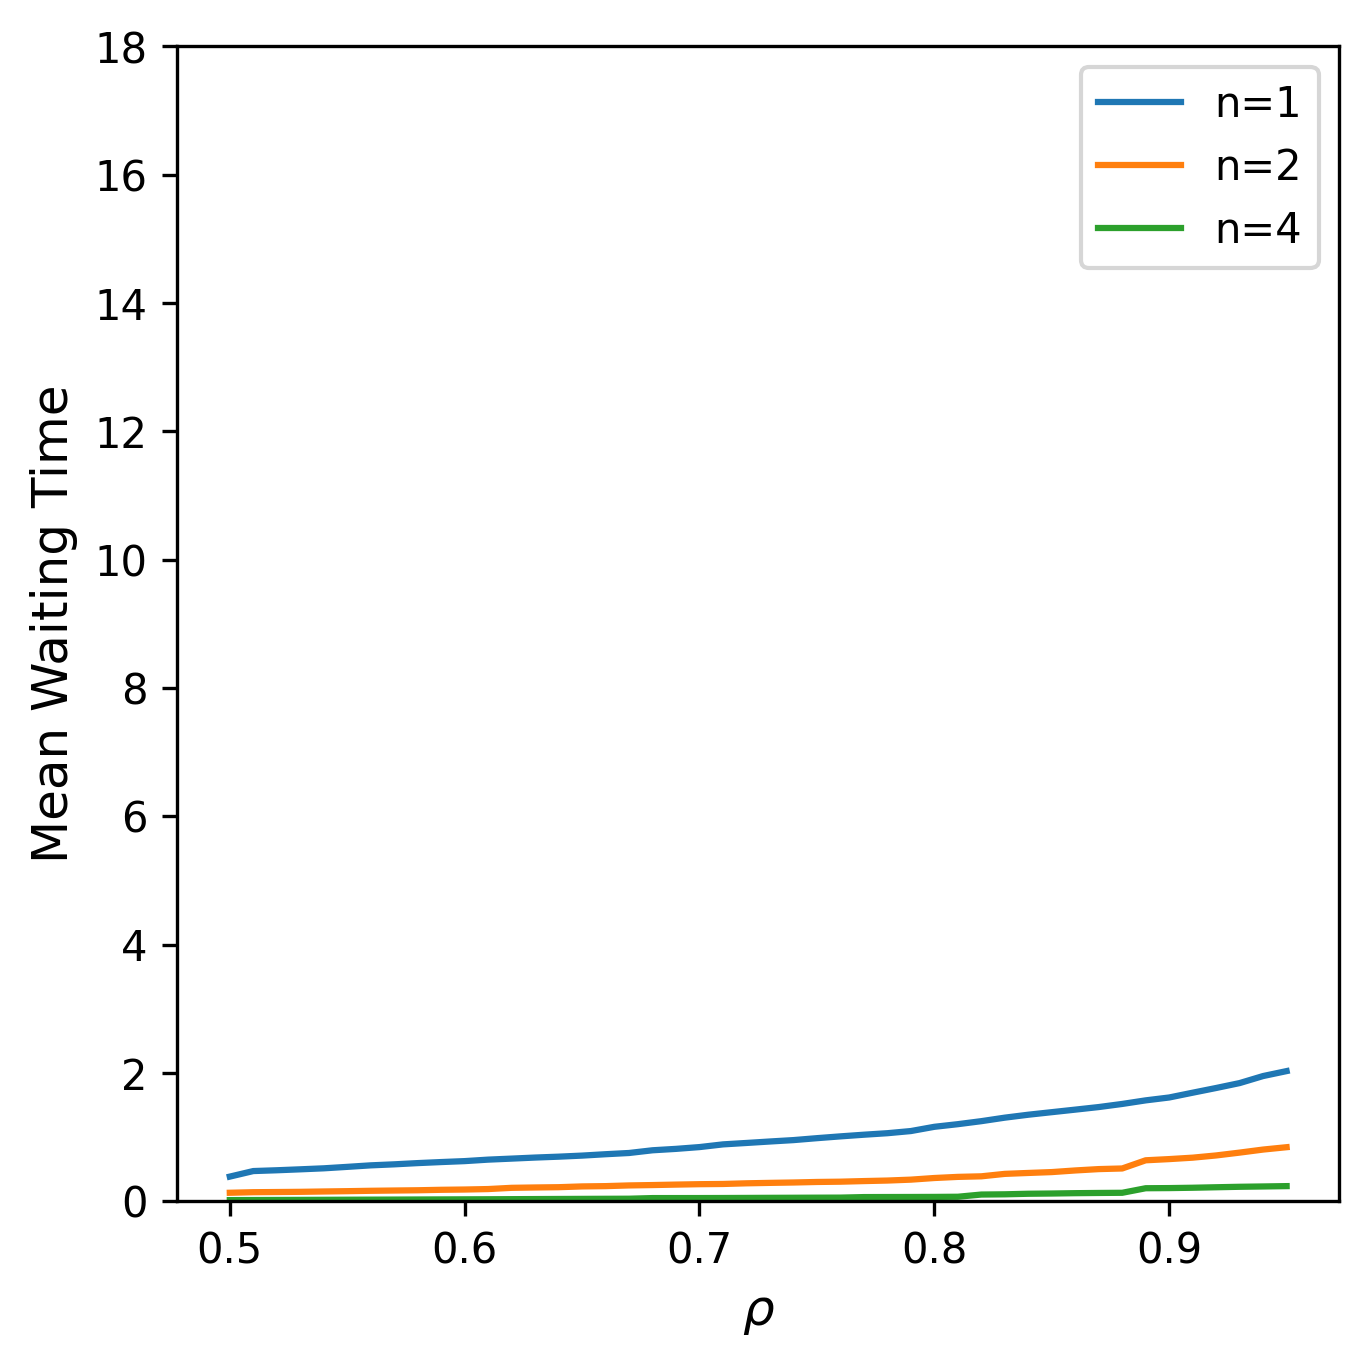

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, means_M_H_1_CorrectRate, label="n=1")
ax.plot(RHO, means_M_H_2_CorrectRate, label="n=2")
ax.plot(RHO, means_M_H_4_CorrectRate, label="n=4")

ax.set_ylabel("Mean Waiting Time", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 18)
ax.legend()

plt.show()

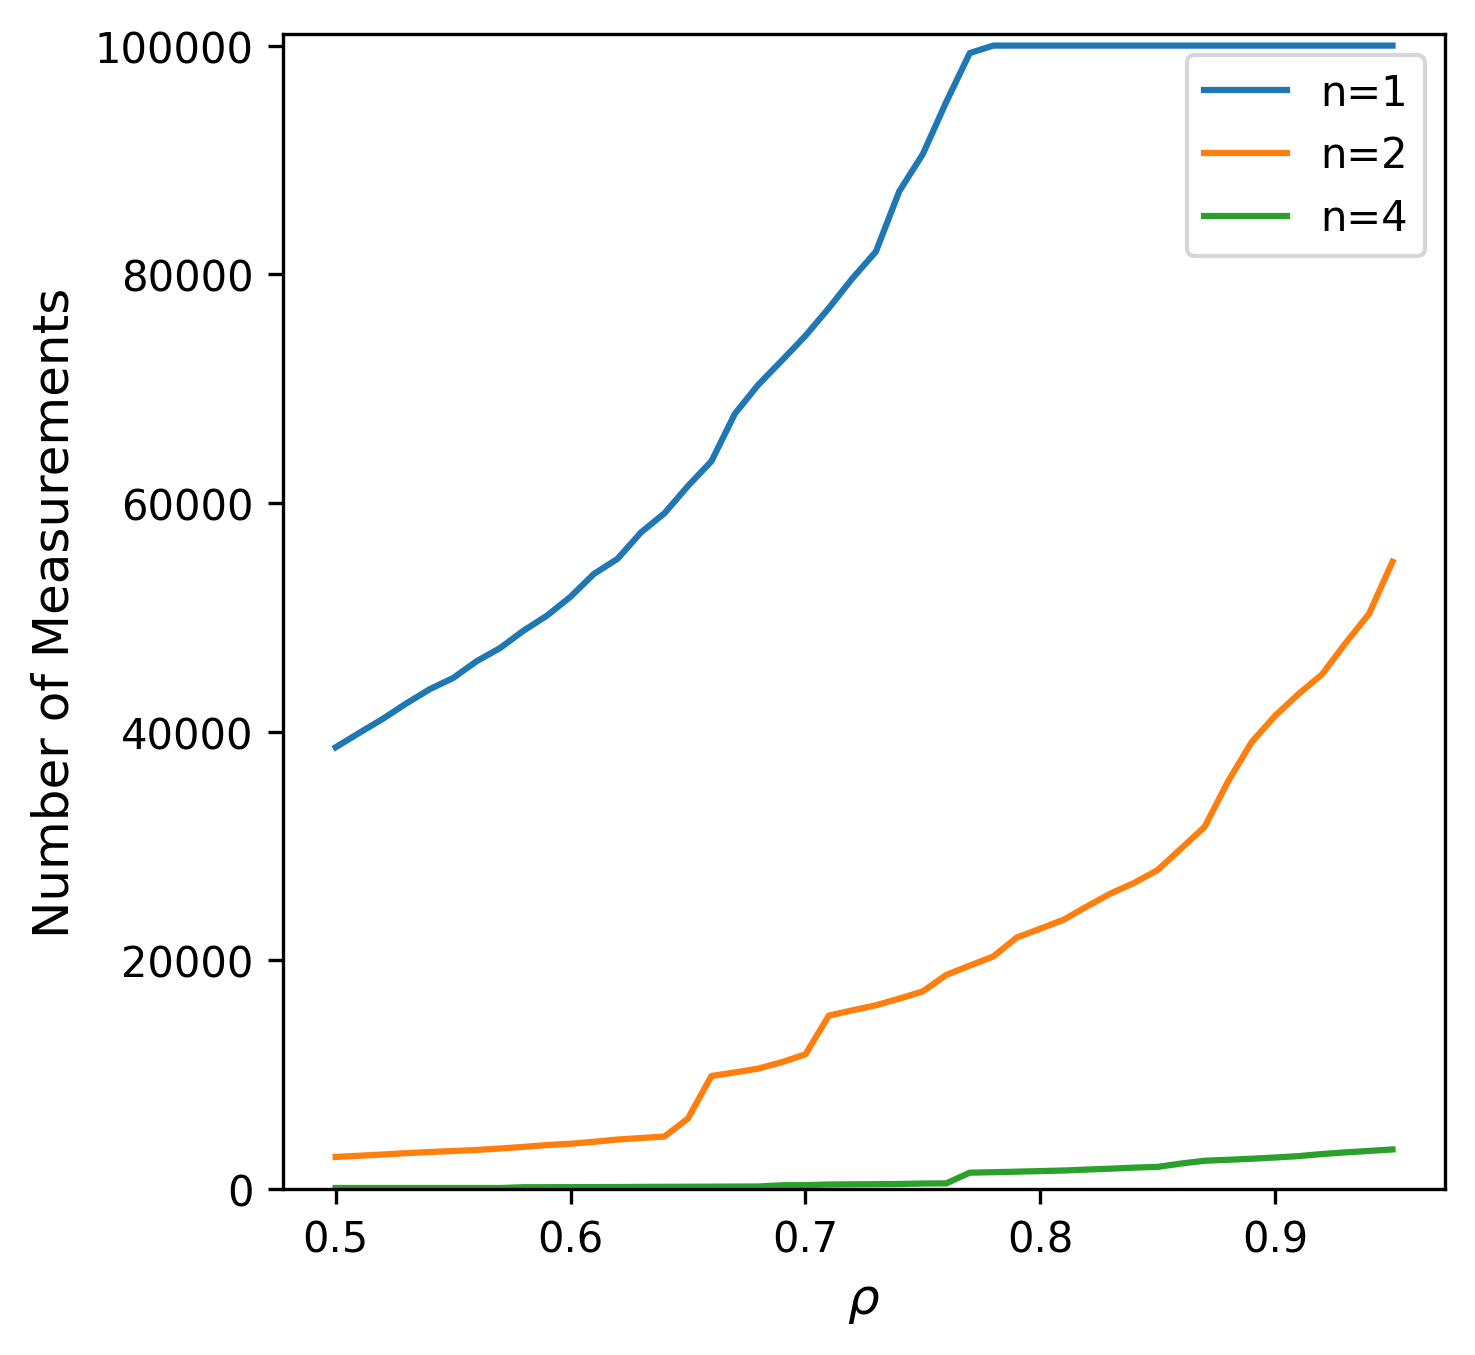

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, [len(l) for l in list_M_H_1_TestRate], label="n=1")
ax.plot(RHO, [len(l) for l in list_M_H_2_TestRate], label="n=2")
ax.plot(RHO, [len(l) for l in list_M_H_4_TestRate], label="n=4")

ax.set_ylabel("Number of Measurements", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 101000)
ax.legend()

plt.show()

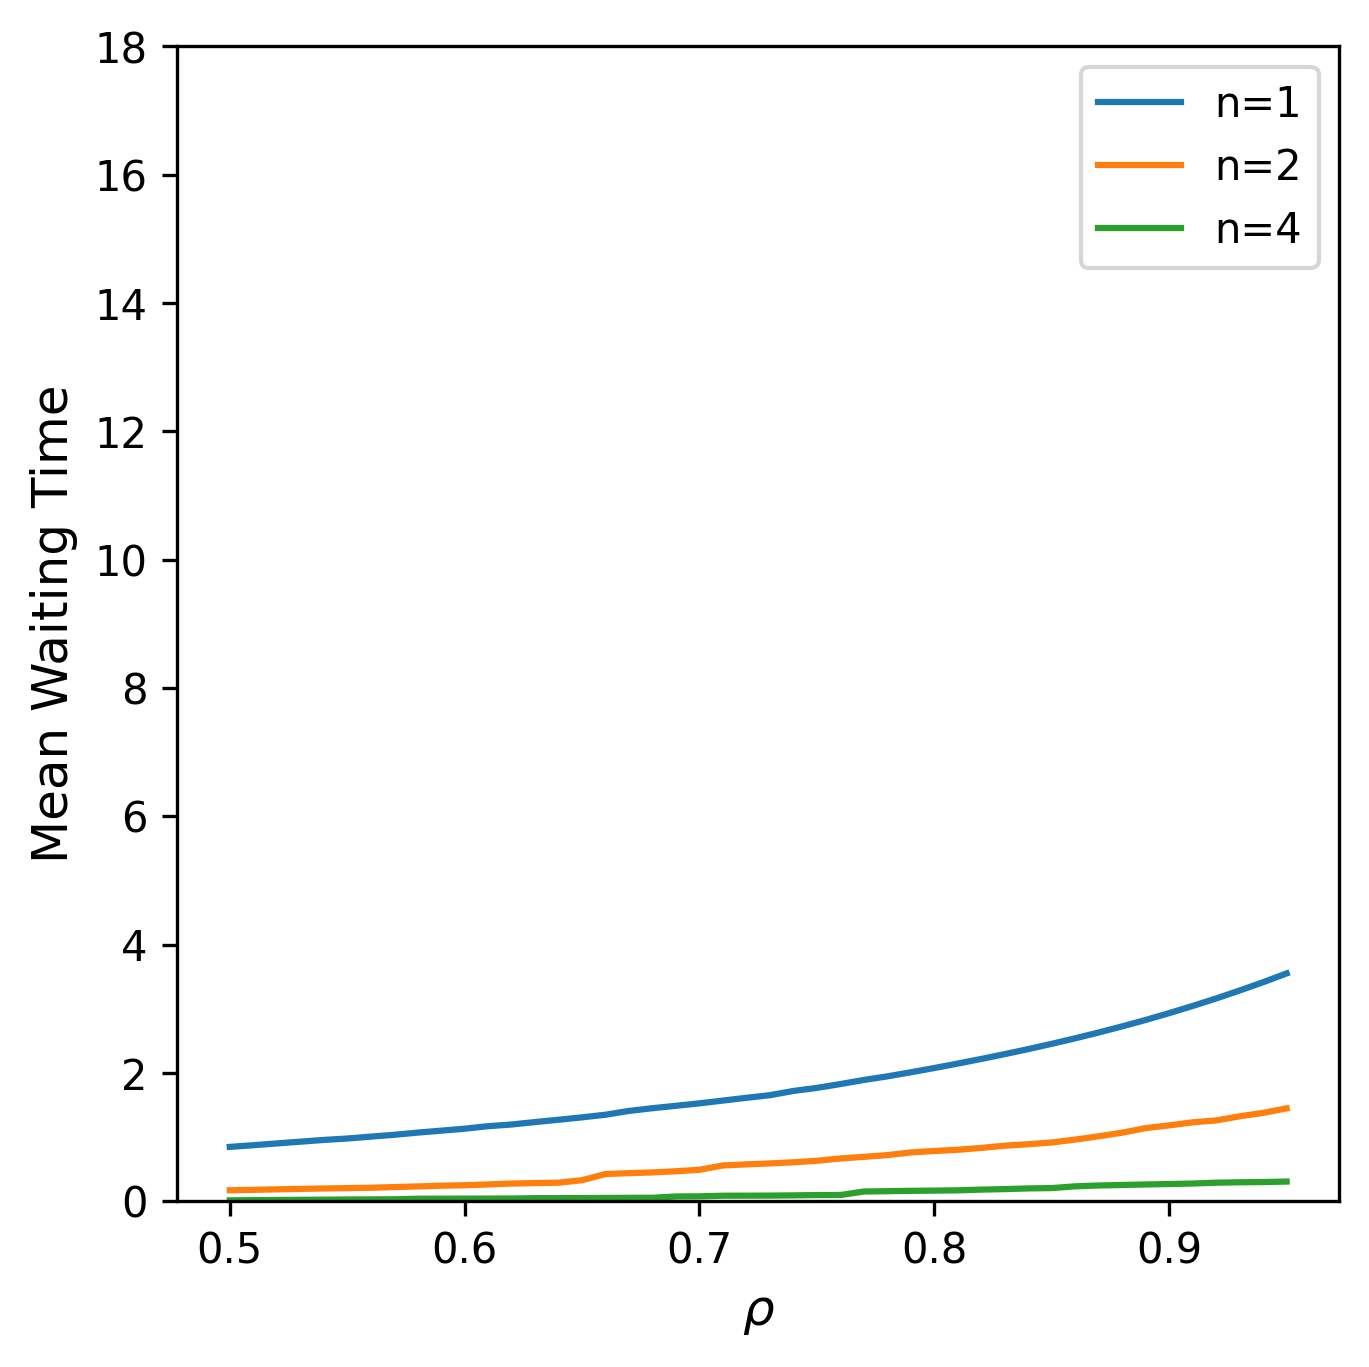

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(RHO, means_M_H_1_TestRate, label="n=1")
ax.plot(RHO, means_M_H_2_TestRate, label="n=2")
ax.plot(RHO, means_M_H_4_TestRate, label="n=4")

ax.set_ylabel("Mean Waiting Time", fontsize=12)

ax.set_xlabel(r"$\rho$", fontsize=12)

ax.set_ylim(0, 18)
ax.legend()

plt.show()